In [1]:
import os
# import pydicom as dicom 
import nibabel as nii 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation 
from sklearn.preprocessing import normalize 
from PIL import Image 
import imageio

#nii 읽기
import nibabel as nib
import random
import shutil
import h5py
import cv2
import shutil
from PIL import Image
from sklearn.metrics import accuracy_score, f1_score, jaccard_score, precision_score, recall_score
from scipy.spatial.distance import directed_hausdorff

In [2]:
# import torch

# from monai.transforms import (
#     EnsureChannelFirstd,
#     LoadImage,
#     LoadImaged,
#     Orientationd,
#     Rand3DElasticd,
#     RandAffined,
#     Spacingd,
# )
# from monai.config import print_config
# from monai.apps import download_and_extract
# import numpy as np
# import matplotlib.pyplot as plt
# import tempfile
# import shutil
# import os
# import glob

In [3]:
example_ni1 = os.path.join('/home/users/aiml_jes/new_class_data/images/ID_02b882cc_ID_a4892e60ae.nii.gz')
n1_img = nib.load(example_ni1)

In [4]:
n1_header = n1_img.header

In [5]:
print(n1_header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 512 512  32   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.         0.488281   0.488281   5.3926735  0.         0.
  0.         0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'Time=0.000'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.98162717
quatern_d       : 0.19080916
qoffset_x       : 125.0
qoffset_y      

In [6]:
# nii = nib.load('/home/users/aiml_jes/new_class_data/images/ID_02b882cc_ID_a4892e60ae.nii.gz') #1.2857122
nii = nib.load('/home/users/aiml_jes/new_class_data/ground truths/ID_fb6d0135_ID_497840f16e.nii.gz')

sx, sy, sz = nii.header.get_zooms()
voxel = sx * sy * sz
voxel

1.2857122

In [7]:
print(sx, sy, sz)

0.488281 0.488281 5.3926735


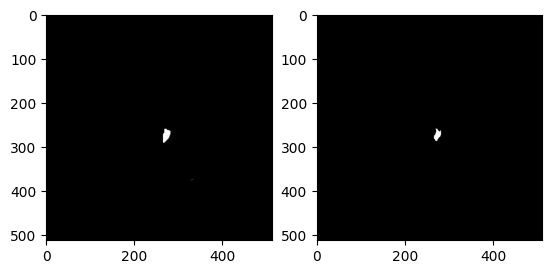

In [8]:
name = 'ID_fcbe7eda_ID_5726e1c630_slice007'

pred = cv2.imread('/home/users/aiml_hbms/kcc2024/JES/results/unet/mask/ID_fcbe7eda_ID_5726e1c630_slice007_pred.jpg')
plt.subplot(121)
plt.imshow(pred, cmap = 'gray')

gt = cv2.imread('/home/users/aiml_hbms/kcc2024/JES/Data/test/gt/ID_fcbe7eda_ID_5726e1c630_slice007.png')
plt.subplot(122)
plt.imshow(gt, cmap = 'gray')

In [9]:
pred = np.where(pred>0, 1, 0)
pred.sum() * voxel

2345.139129638672

In [10]:
file_list = os.listdir('/home/users/aiml_hbms/kcc2024/JES/Data/test/gt/')
gt_path = '/home/users/aiml_hbms/kcc2024/JES/Data/test/gt/'
pred_path = '/home/users/aiml_hbms/kcc2024/JES/results/unet/mask/'
gt_list = []
pred_list = []
for i in file_list:
    pred_file = i.split('.png')[0]

    gt = cv2.imread(gt_path + i)
    gt = np.where(gt>0, 1, 0)
    gt = gt.sum() * voxel *0.001
    
    pred = cv2.imread(pred_path + pred_file + '_pred.jpg')
    pred = np.where(pred>0, 1, 0)
    pred = pred.sum() * voxel * 0.001
    
    gt_list.append(gt)
    pred_list.append(pred)

In [11]:
gt_dict = dict(zip(gt_list , pred_list))
gt_list = []
pred_list = []
# print(gt_dict)
gt_dict = sorted(gt_dict.items())
for i in range(len(gt_dict)):
    gt_list.append(gt_dict[i][0])
    pred_list.append(gt_dict[i][1])

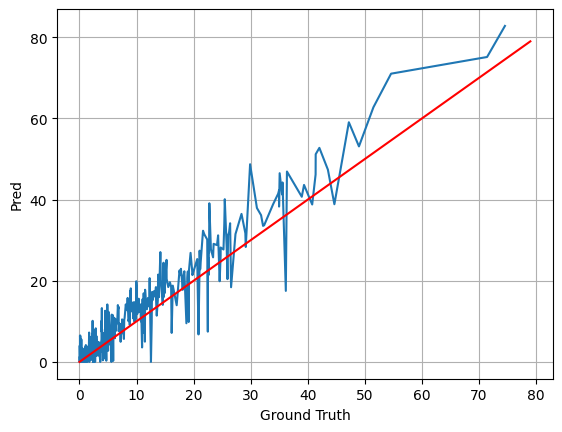

In [12]:
##Unet

file_list = os.listdir('/home/users/aiml_hbms/kcc2024/JES/Data/test/gt/')
gt_path = '/home/users/aiml_hbms/kcc2024/JES/Data/test/gt/'
pred_path = '/home/users/aiml_hbms/kcc2024/JES/results/unet/mask/'
gt_list = []
pred_list = []
for i in file_list:
    pred_file = i.split('.png')[0]

    gt = cv2.imread(gt_path + i)
    gt = np.where(gt>0, 1, 0)
    gt = gt.sum() * voxel *0.001
    
    pred = cv2.imread(pred_path + pred_file + '_pred.jpg')
    pred = np.where(pred>0, 1, 0)
    pred = pred.sum() * voxel * 0.001
    
    gt_list.append(gt)
    pred_list.append(pred)
gt_dict = dict(zip(gt_list , pred_list))
gt_list = []
pred_list = []
# print(gt_dict)
gt_dict = sorted(gt_dict.items())
for i in range(len(gt_dict)):
    gt_list.append(gt_dict[i][0])
    pred_list.append(gt_dict[i][1])
base_x = np.arange(0, 80, 1)
base_y = np.arange(0, 80, 1)
plt.plot(gt_list, pred_list, base_x, base_y, '-r')
plt.xlabel('Ground Truth')
plt.ylabel('Pred')
plt.grid(True)

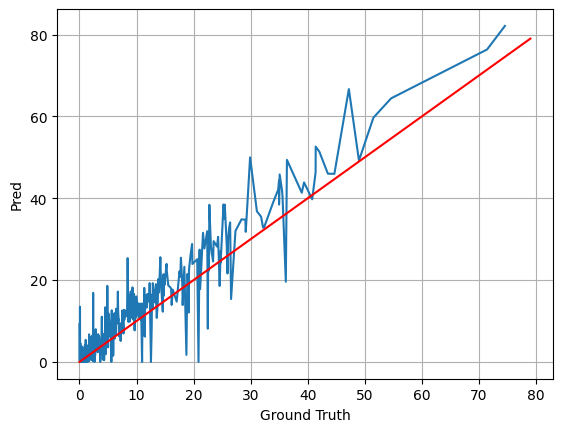

In [13]:
## Unet ++

file_list = os.listdir('/home/users/aiml_hbms/kcc2024/JES/Data/test/gt/')
gt_path = '/home/users/aiml_hbms/kcc2024/JES/Data/test/gt/'
pred_path = '/home/users/aiml_hbms/kcc2024/JES/results/unet2plus/mask/'
gt_list = []
pred_list = []
for i in file_list:
    pred_file = i.split('.png')[0]

    gt = cv2.imread(gt_path + i)
    gt = np.where(gt>0, 1, 0)
    gt = gt.sum() * voxel * 0.001
    
    pred = cv2.imread(pred_path + pred_file + '_pred.jpg')
    pred = np.where(pred>0, 1, 0)
    pred = pred.sum() * voxel * 0.001
    
    gt_list.append(gt)
    pred_list.append(pred)
gt_dict = dict(zip(gt_list , pred_list))
gt_list = []
pred_list = []
# print(gt_dict)
gt_dict = sorted(gt_dict.items())
for i in range(len(gt_dict)):
    gt_list.append(gt_dict[i][0])
    pred_list.append(gt_dict[i][1])

base_x = np.arange(0, 80, 1)
base_y = np.arange(0, 80, 1)

plt.plot(gt_list, pred_list, base_x, base_y, '-r')
plt.xlabel('Ground Truth')
plt.ylabel('Pred')
plt.grid(True)

0


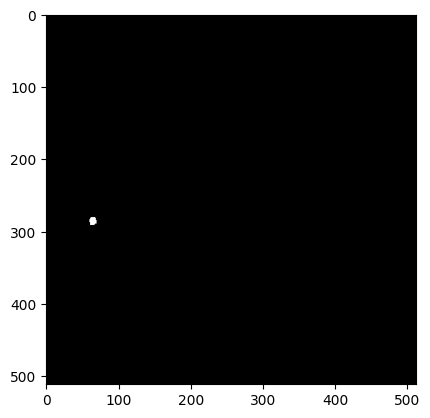

1


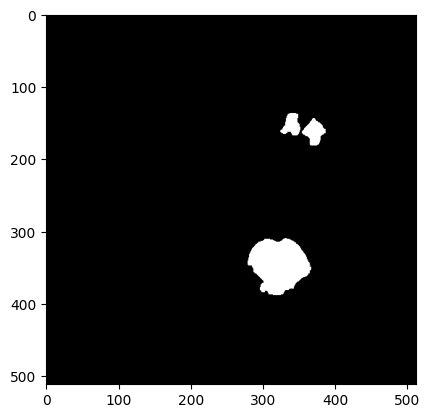

2


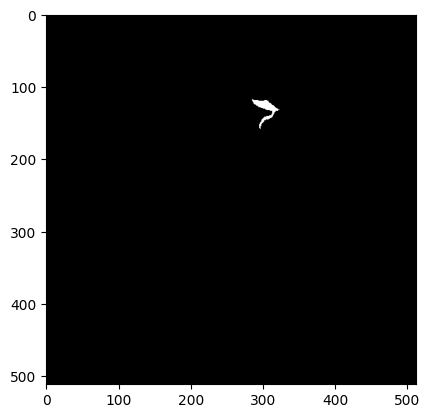

3


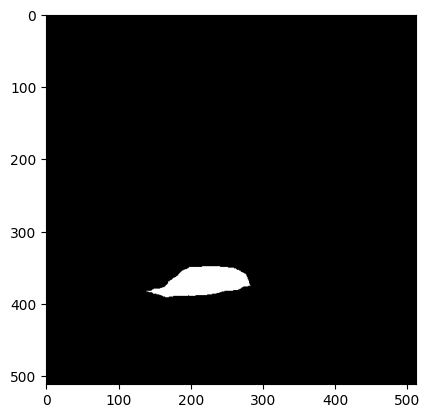

4


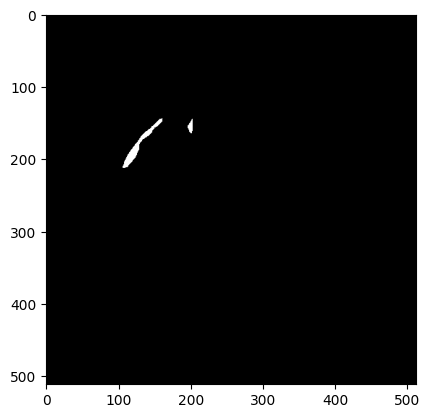

5


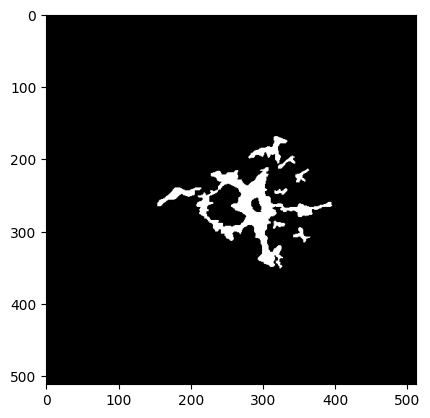

6


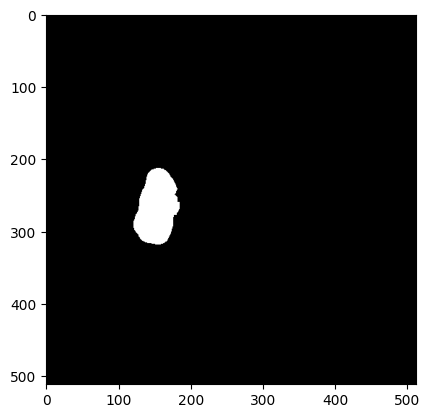

7


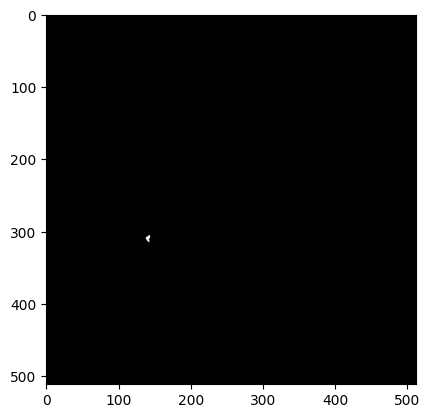

8


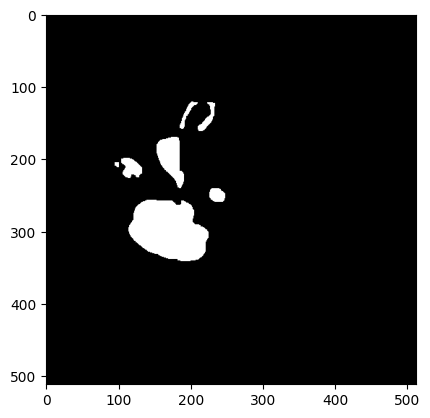

9


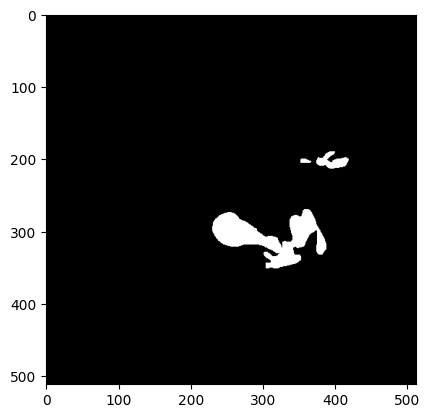

10


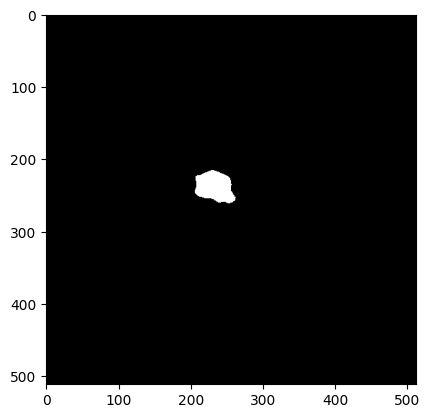

11


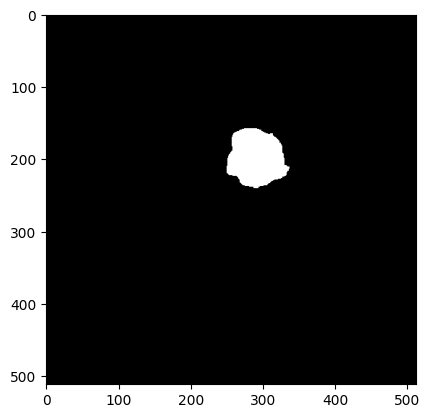

12


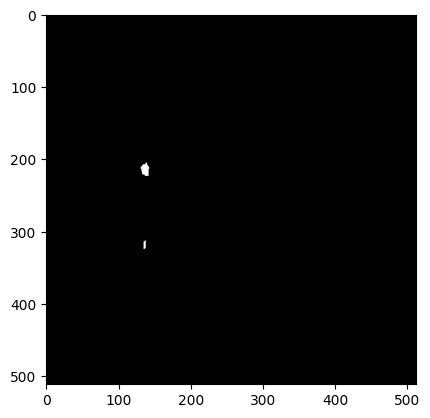

13


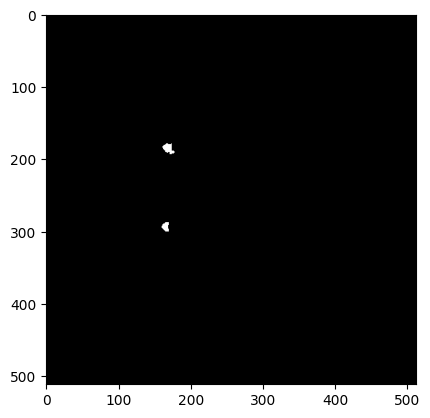

14


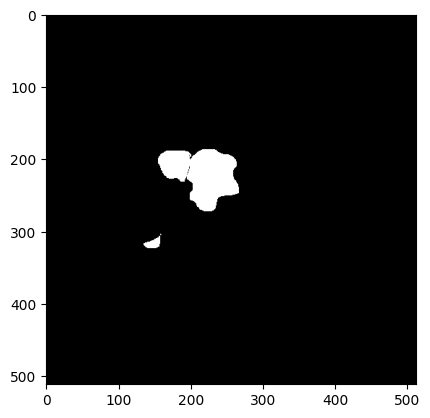

15


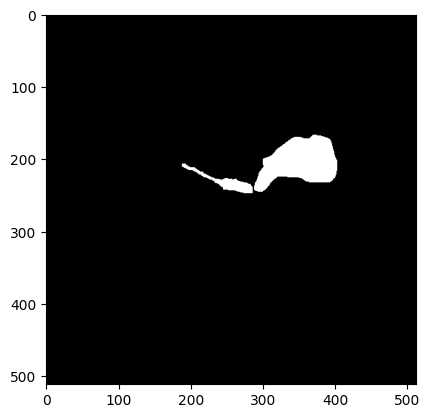

16


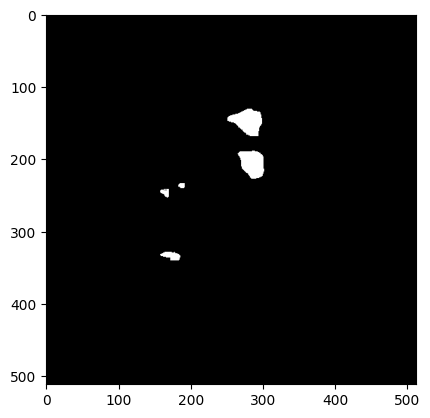

17


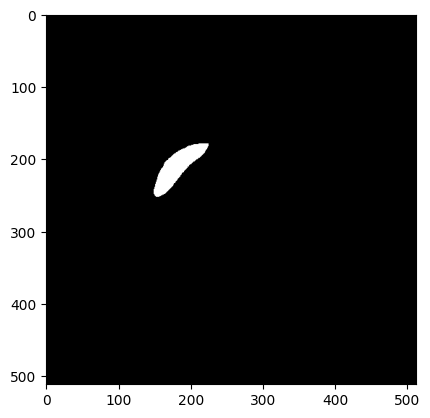

18


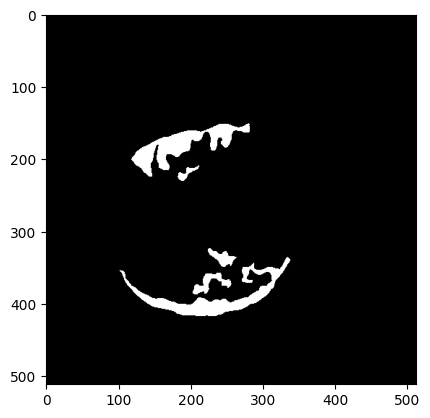

19


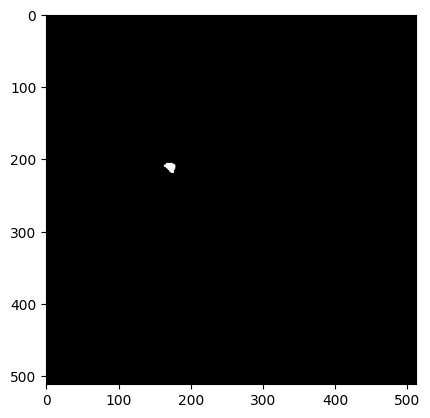

20


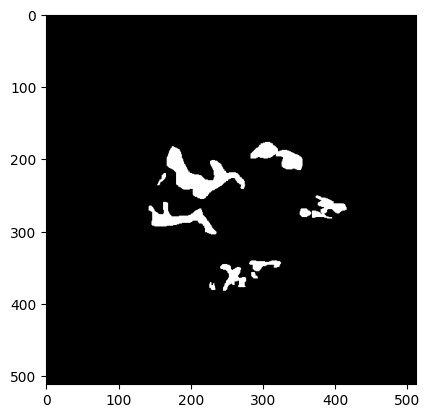

21


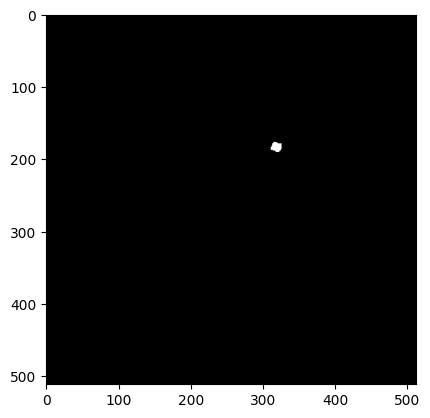

22


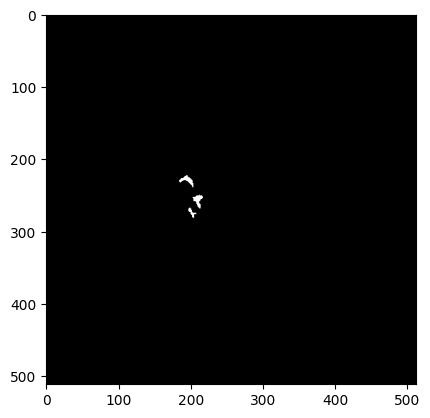

23


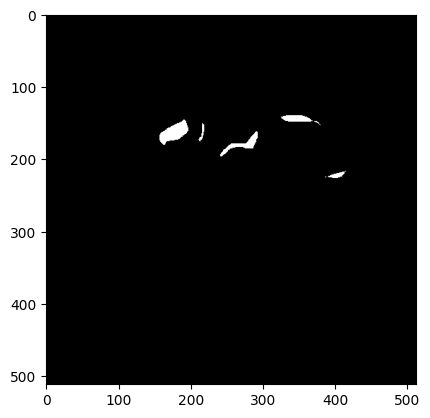

24


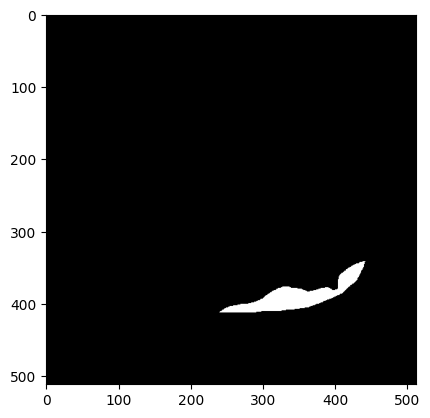

25


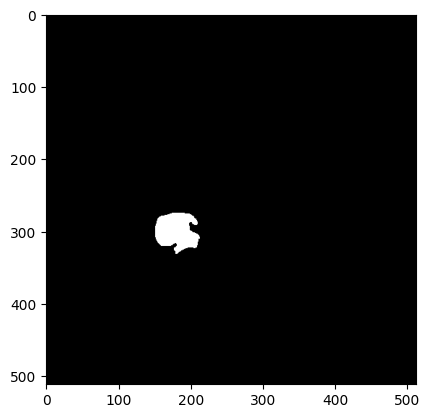

26


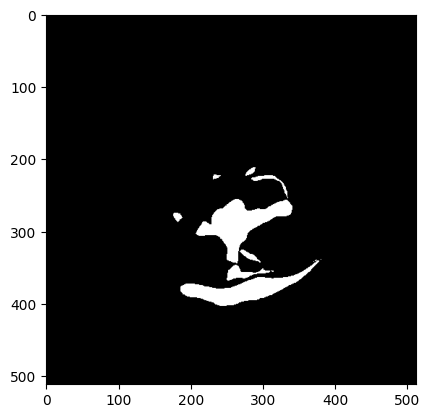

27


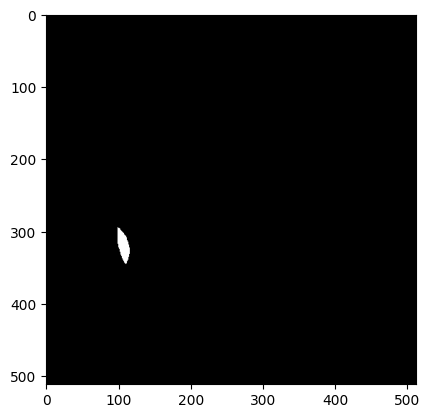

28


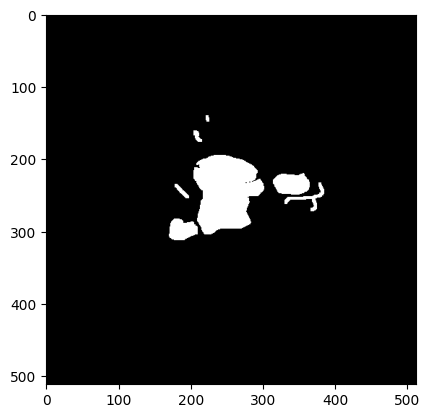

29


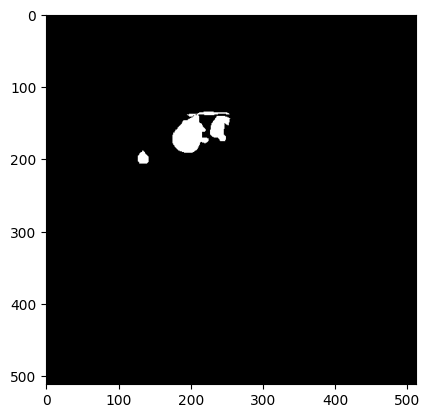

30


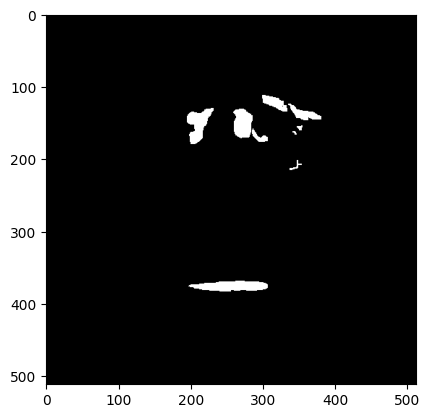

31


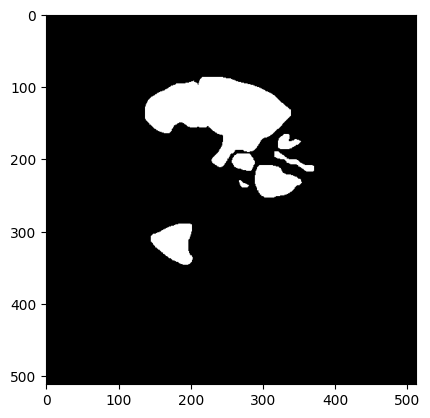

32


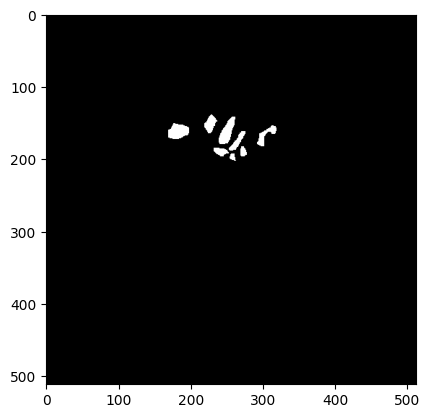

33


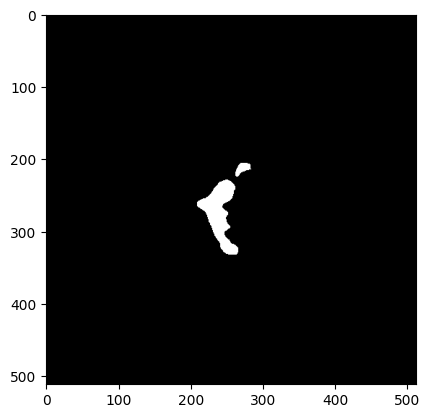

34


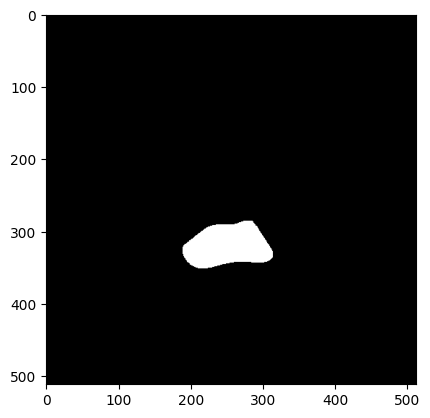

35


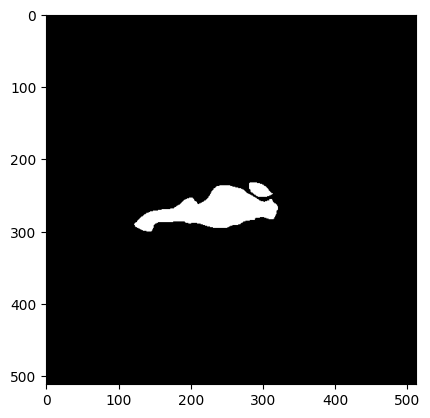

36


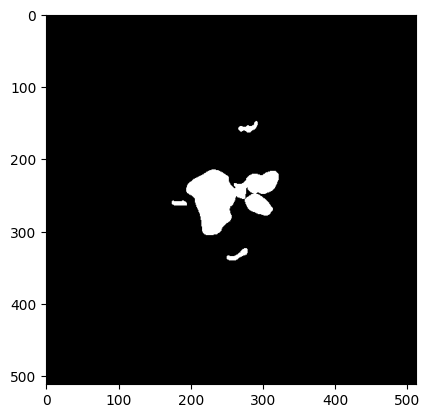

37


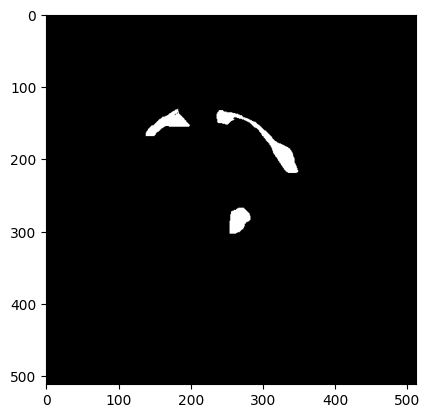

38


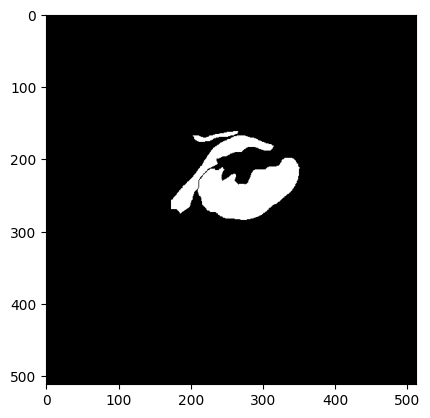

39


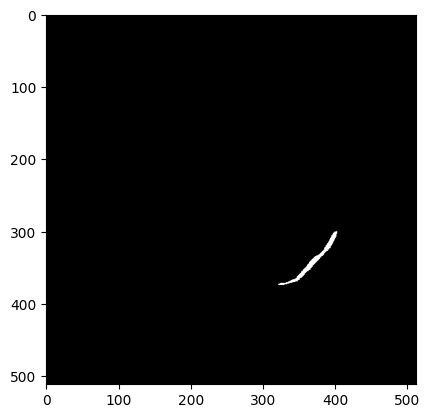

40


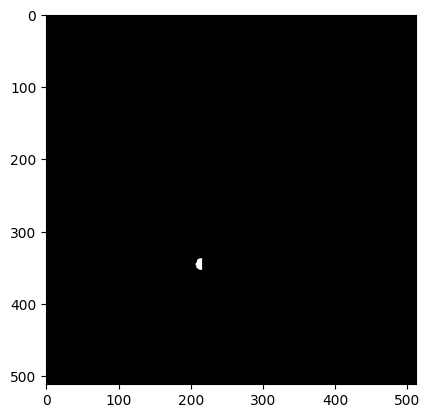

41


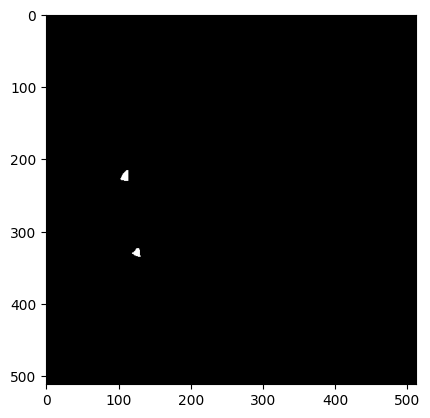

42


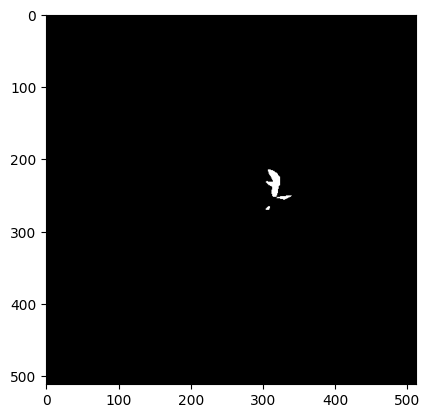

43


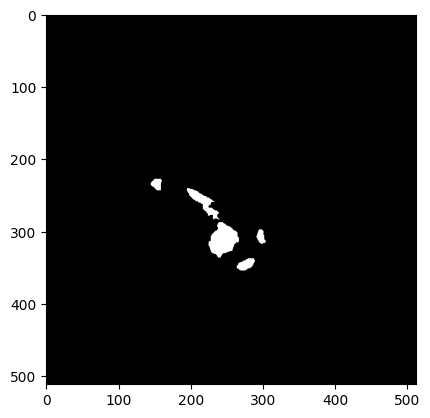

44


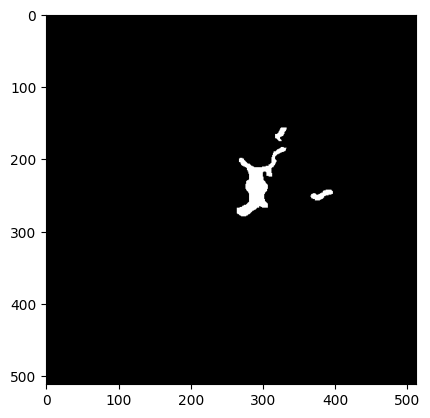

45


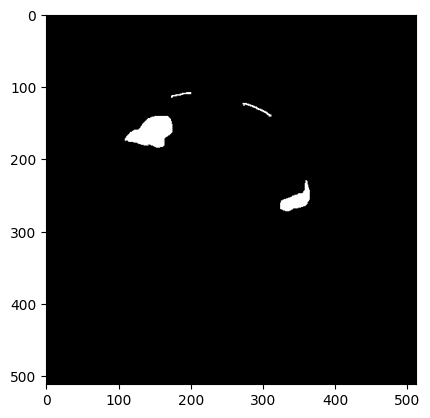

46


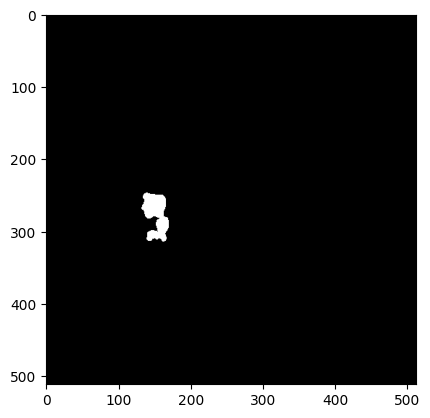

47


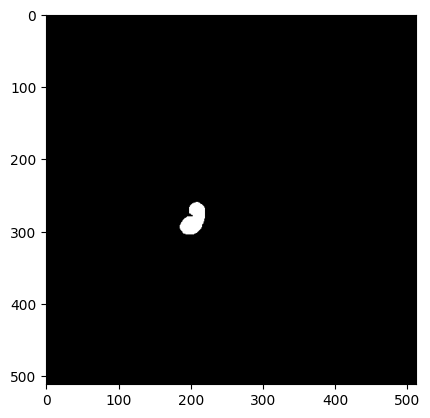

48


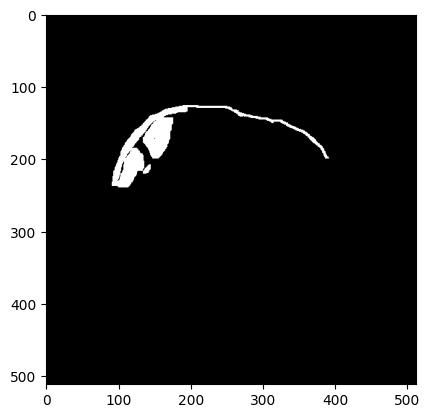

49


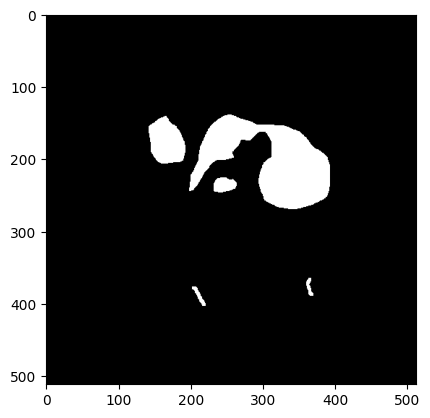

50


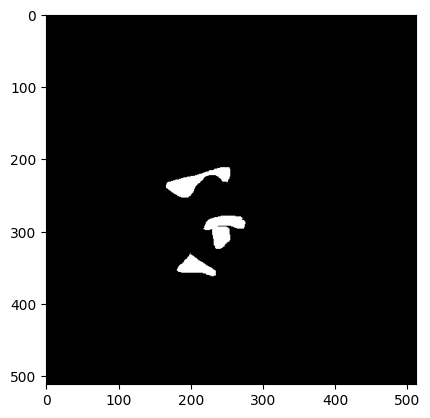

51


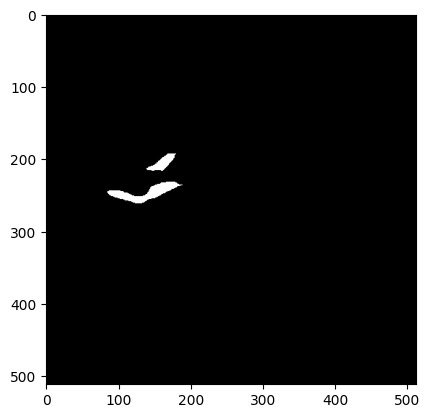

52


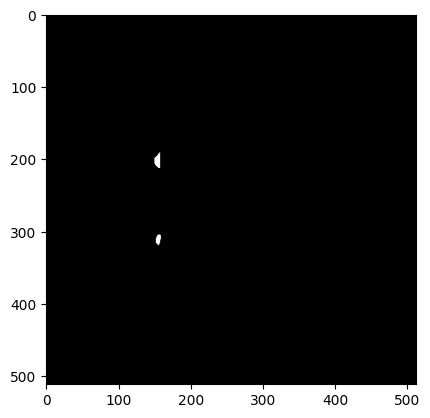

53


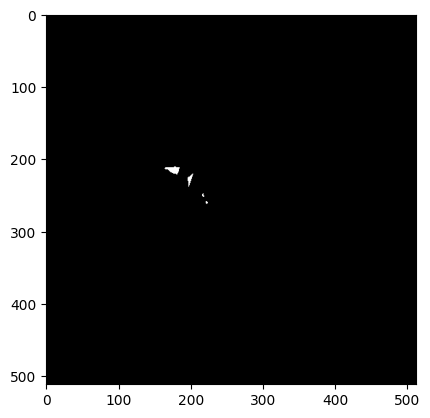

54


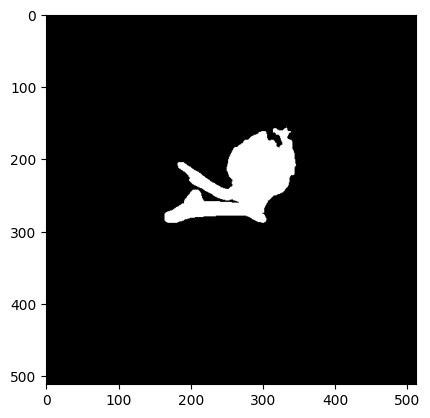

55


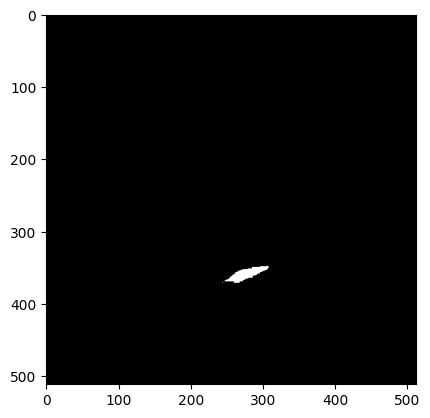

56


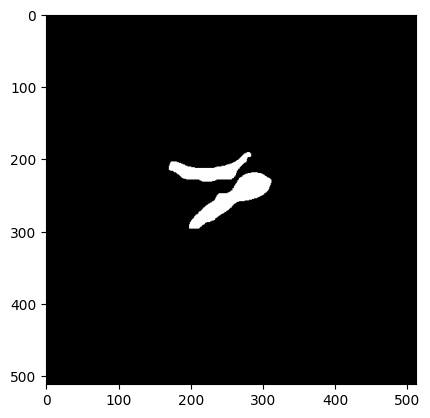

57


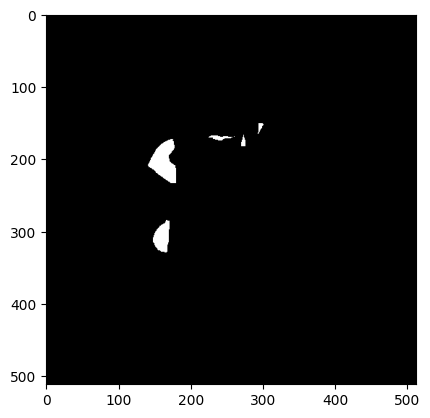

58


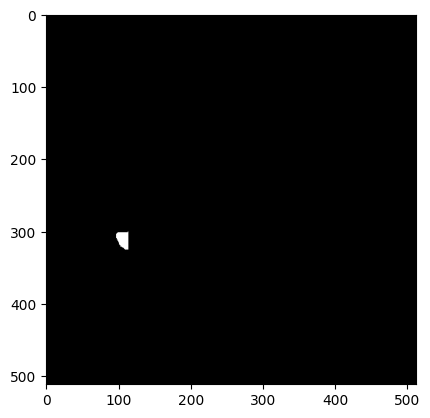

59


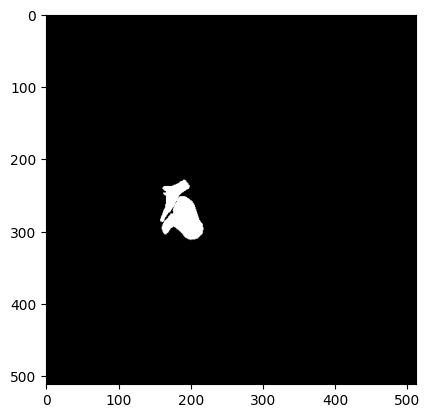

60


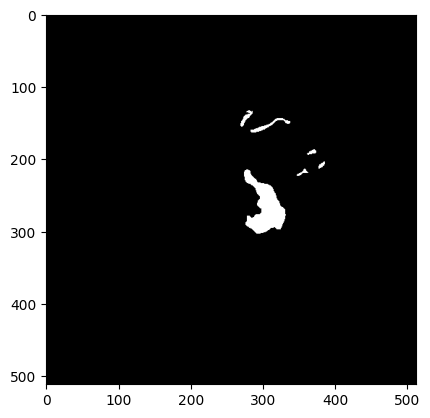

61


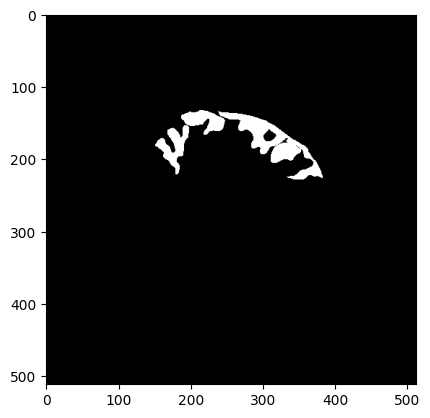

62


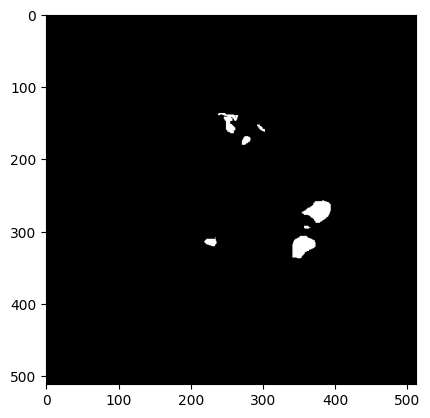

63


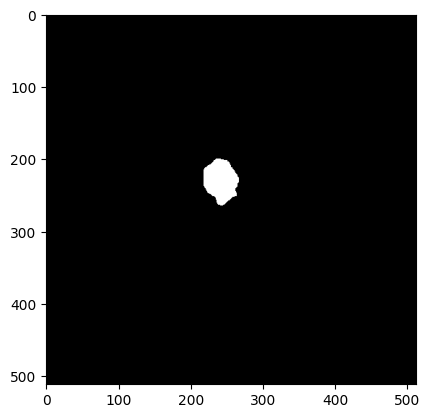

64


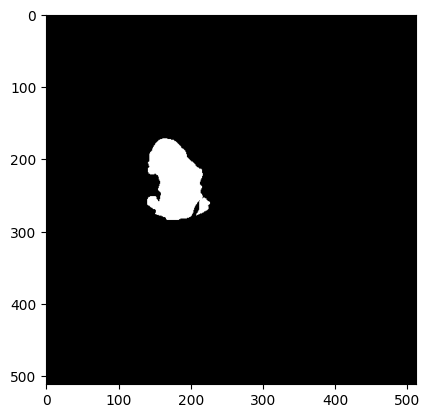

65


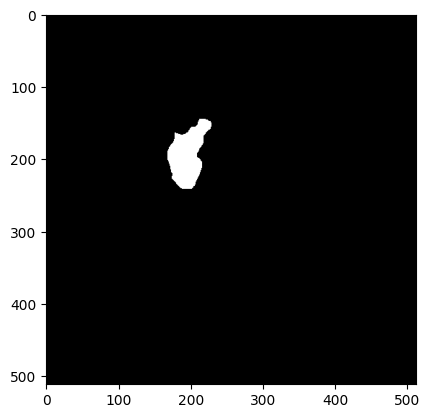

66


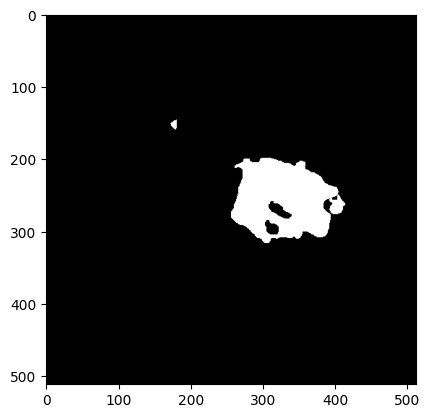

67


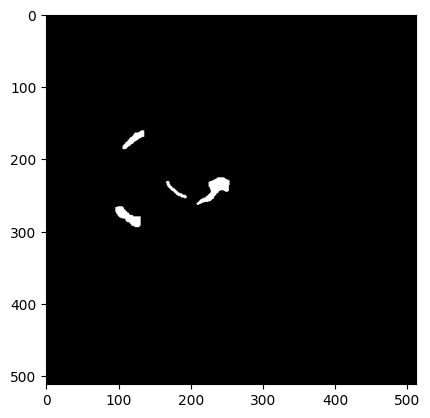

68


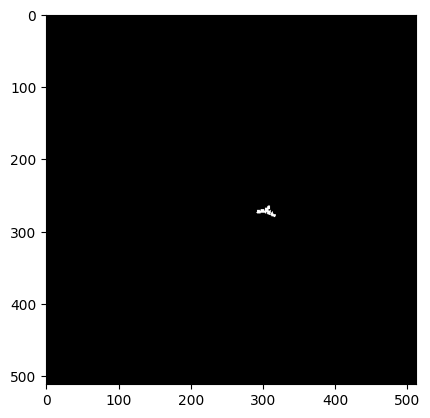

69


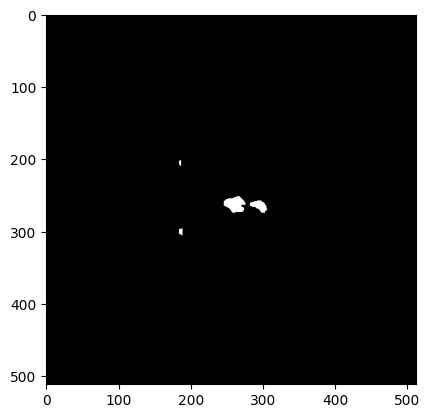

70


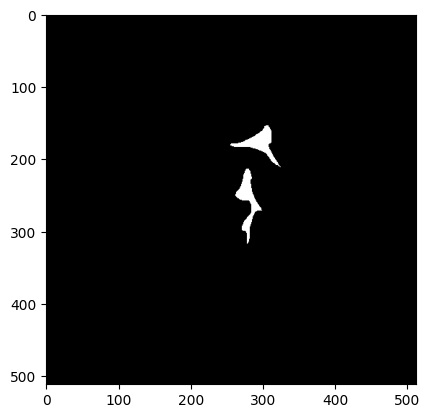

71


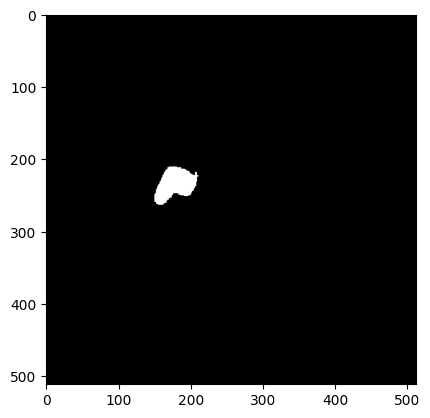

72


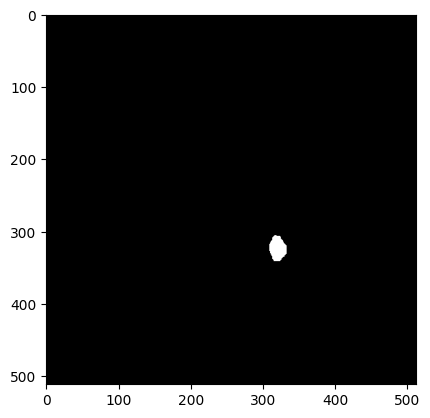

73


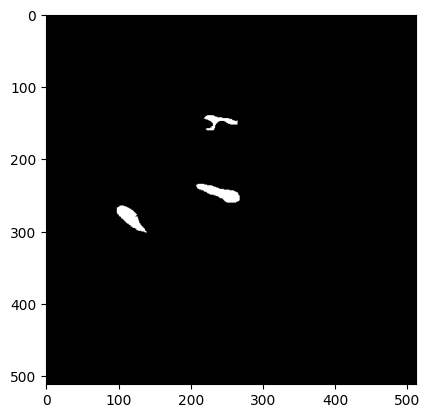

74


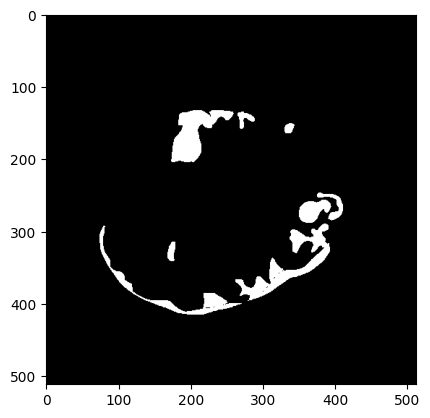

75


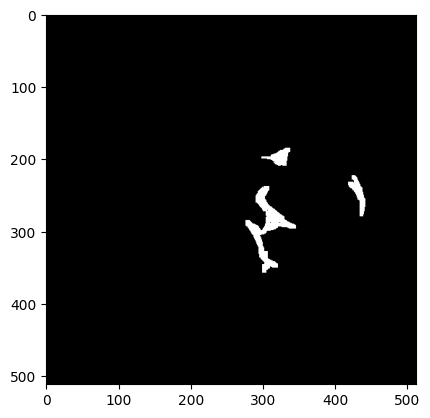

76


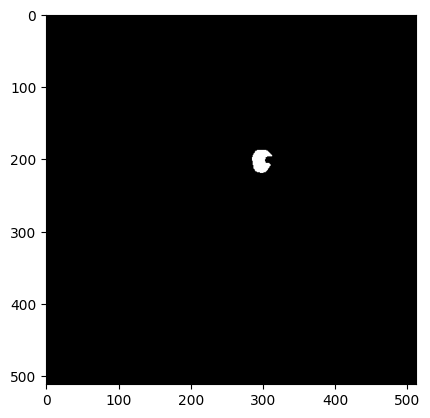

77


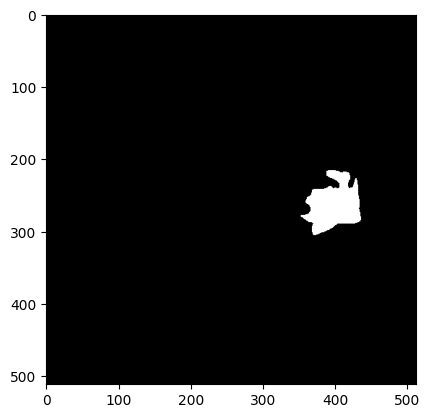

78


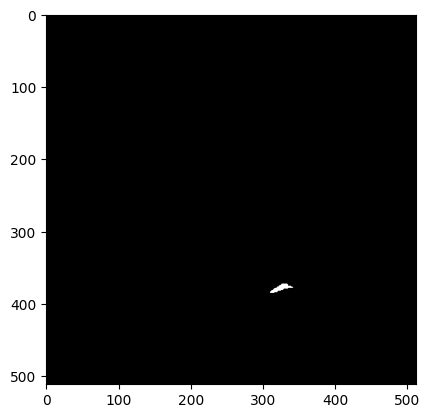

79


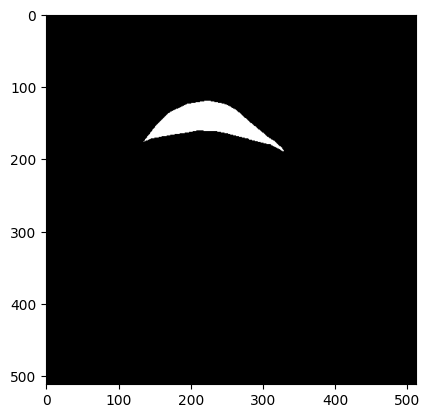

80


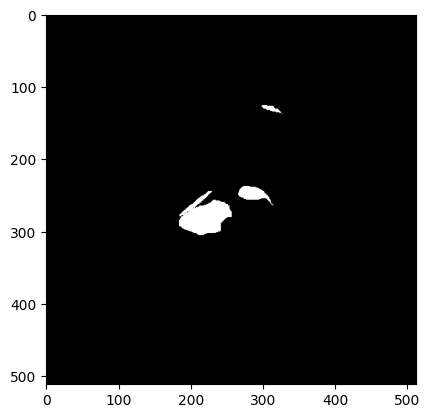

81


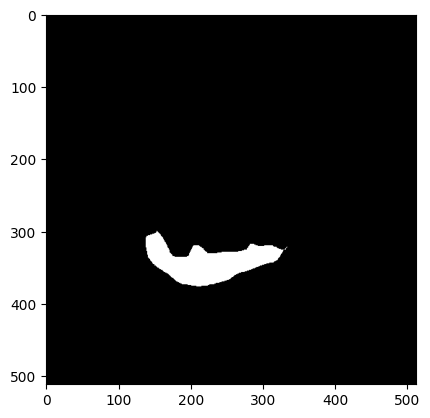

82


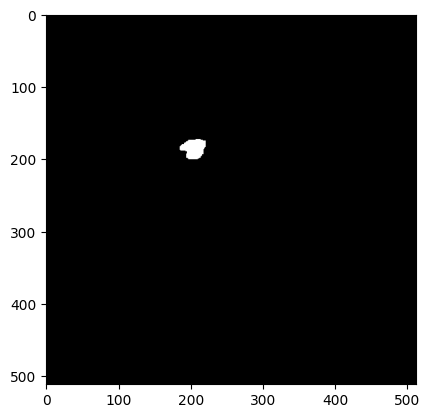

83


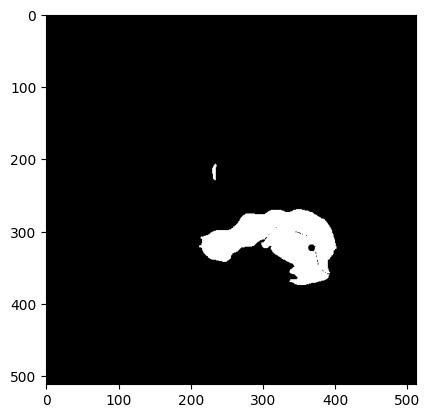

84


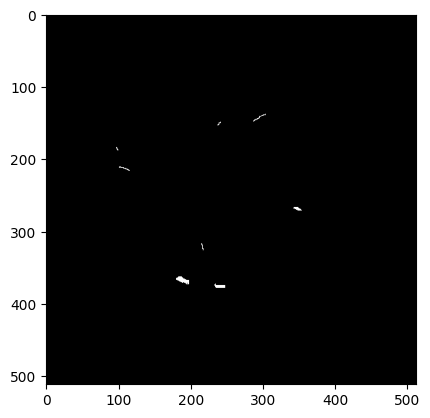

85


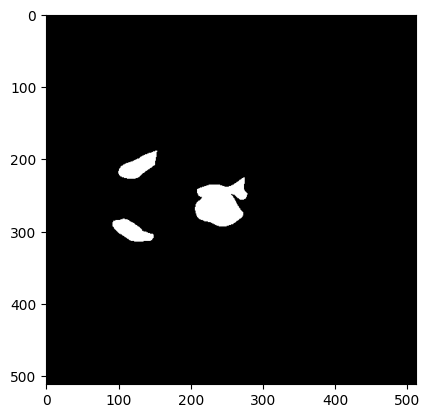

86


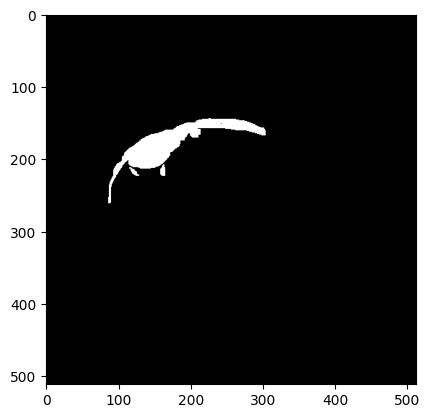

87


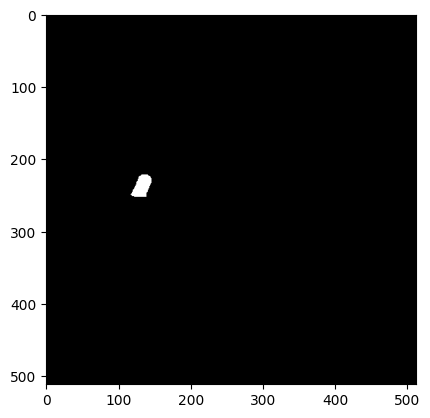

88


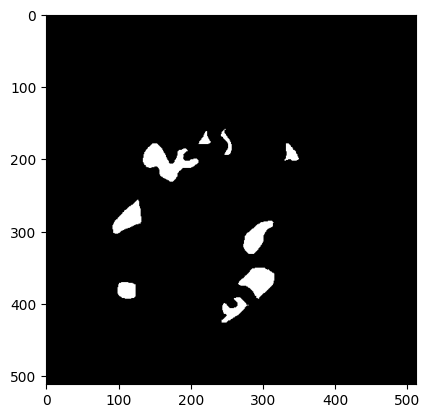

89


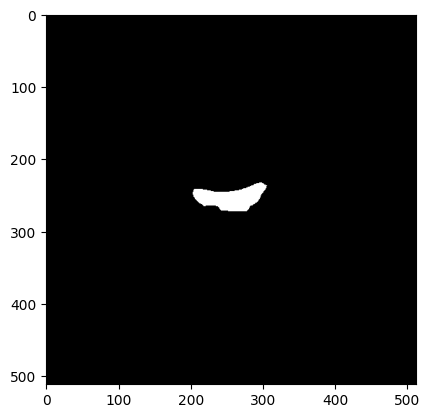

90


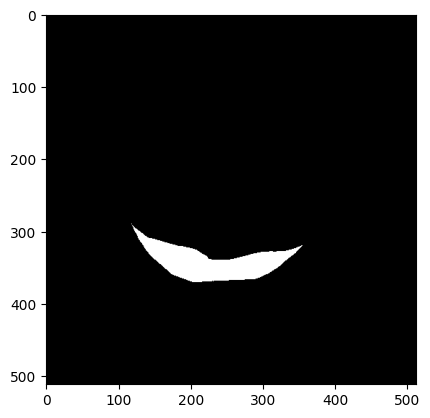

91


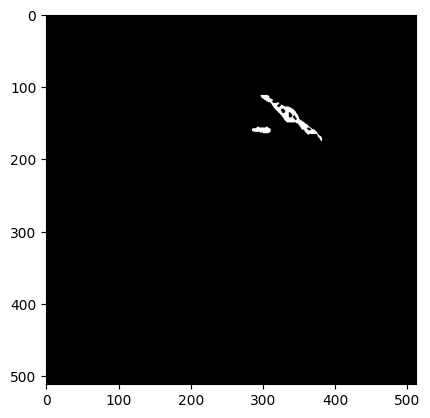

92


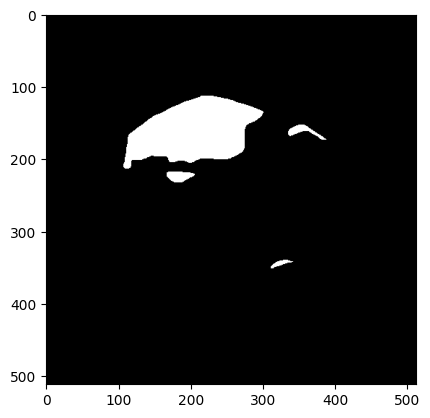

93


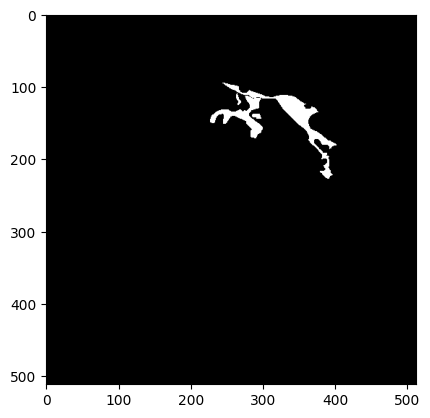

94


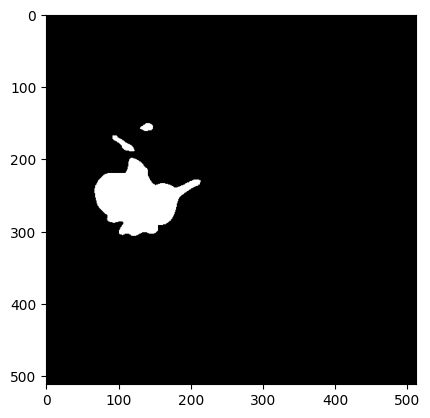

95


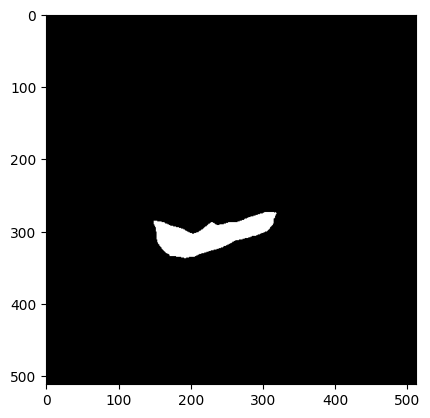

96


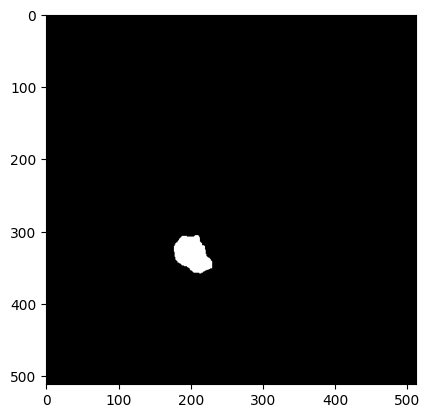

97


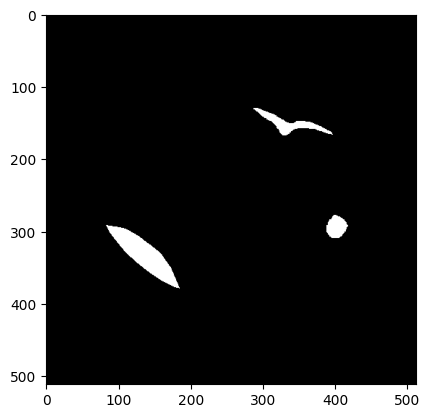

98


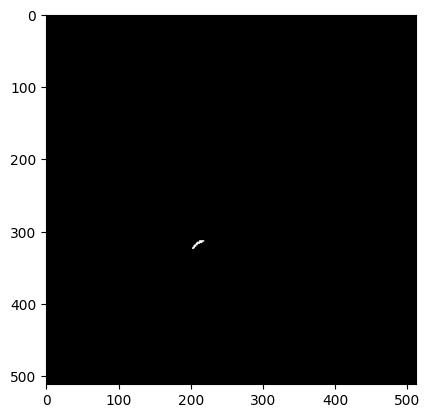

99


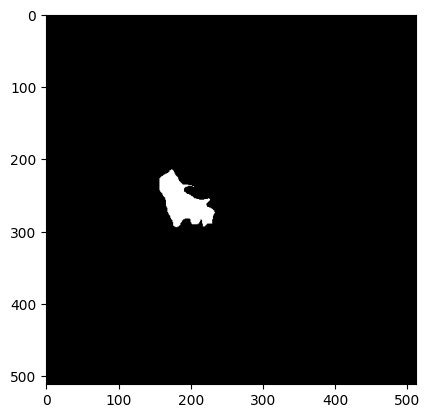

100


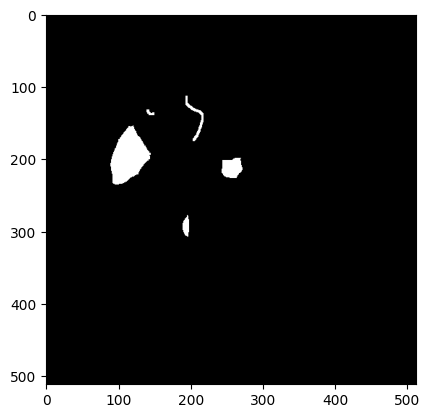

101


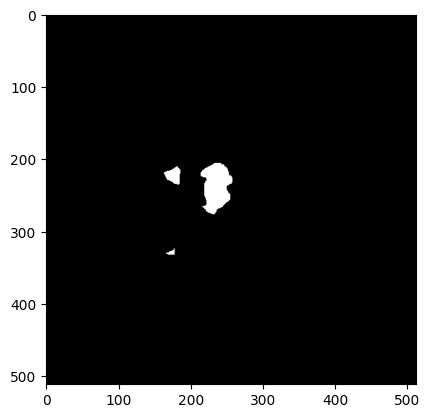

102


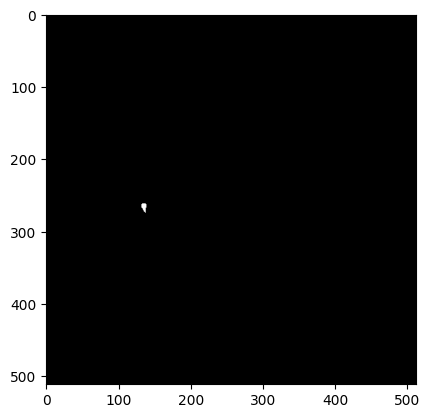

103


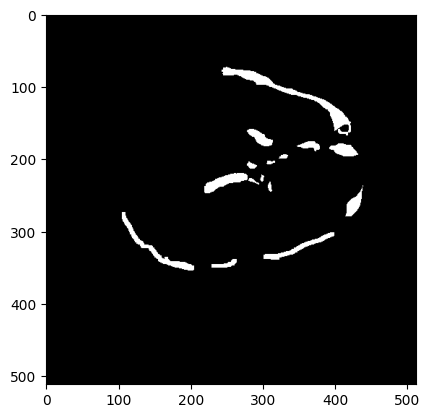

104


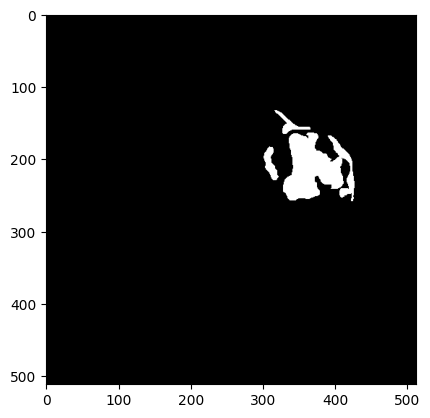

105


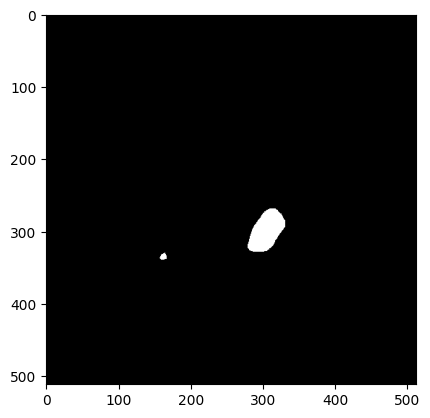

106


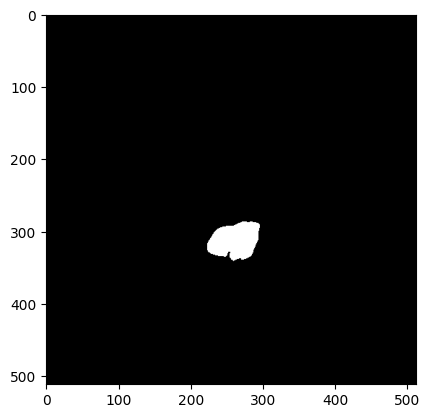

107


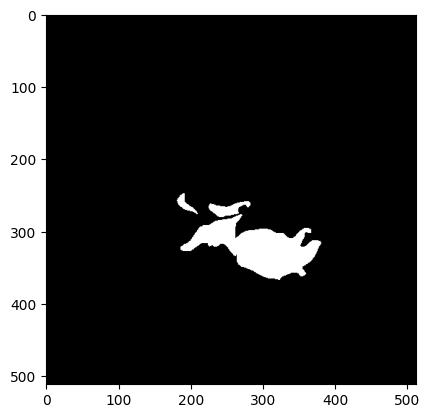

108


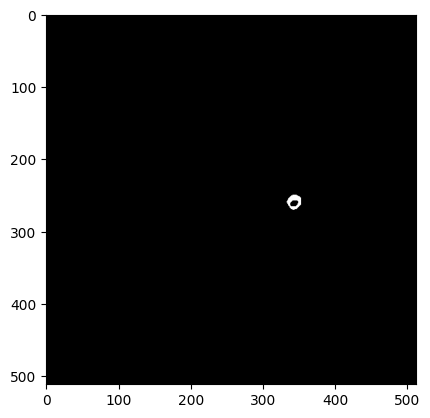

109


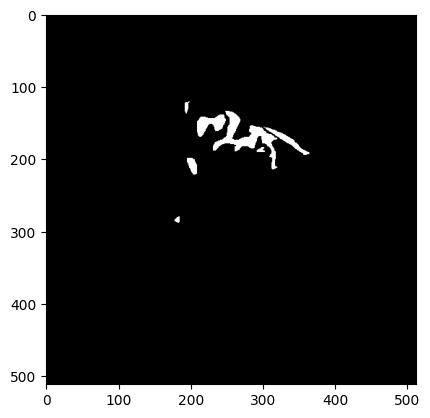

110


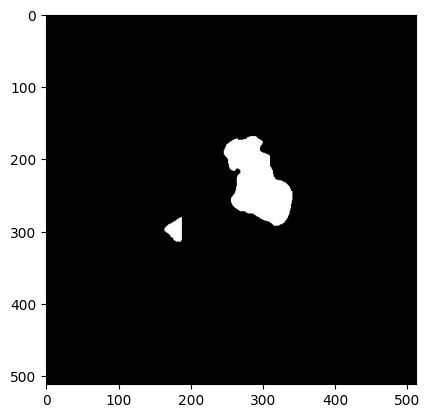

111


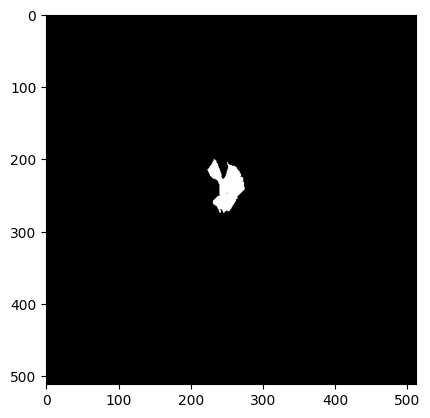

112


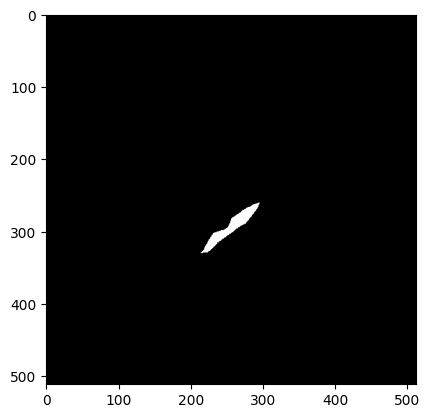

113


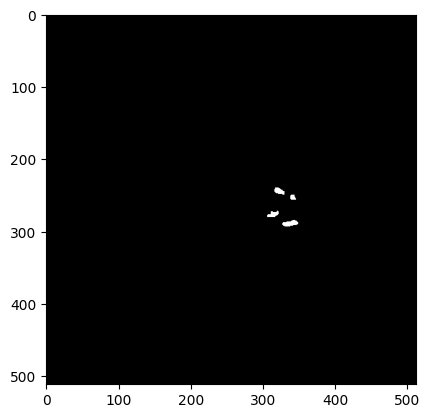

114


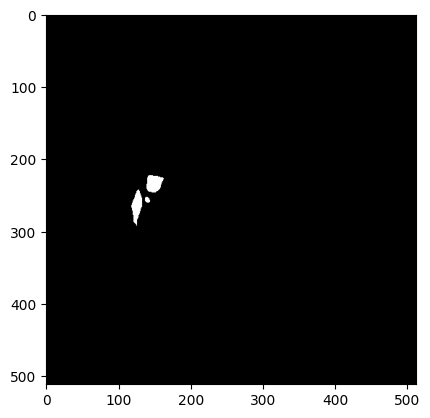

115


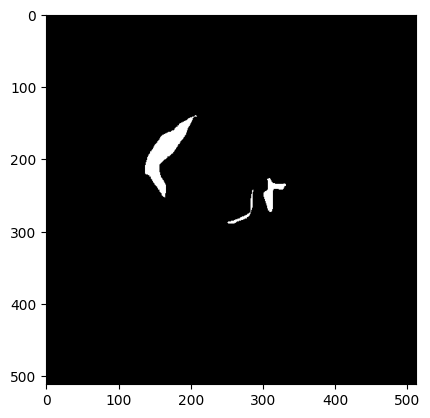

116


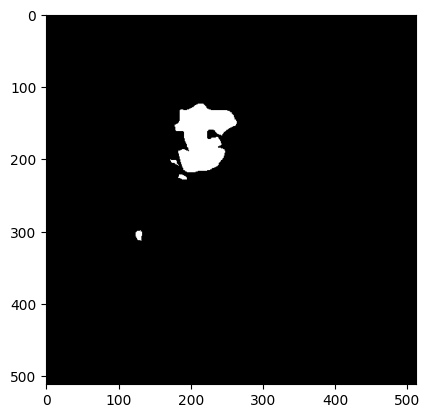

117


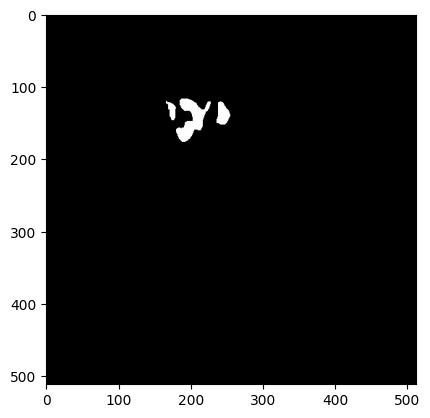

118


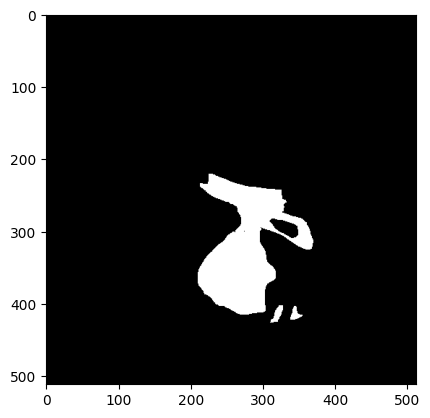

119


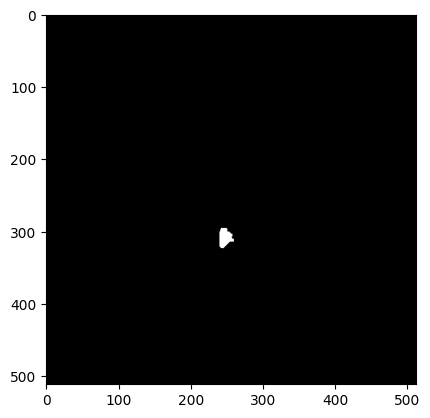

120


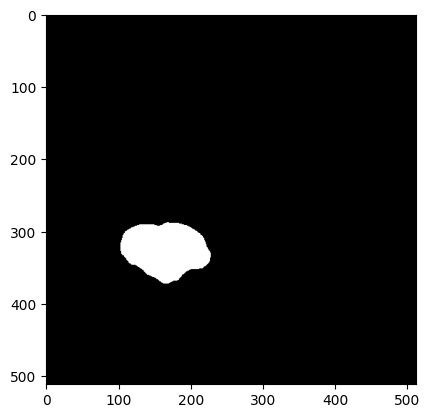

121


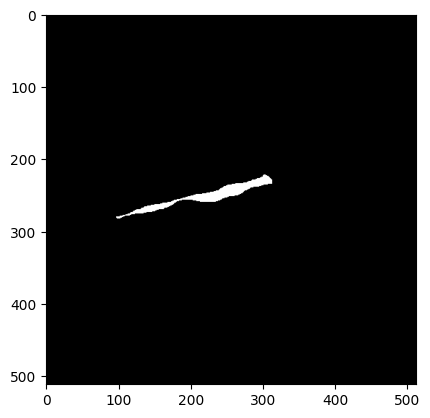

122


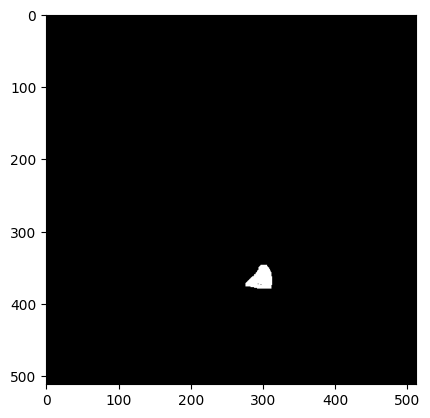

123


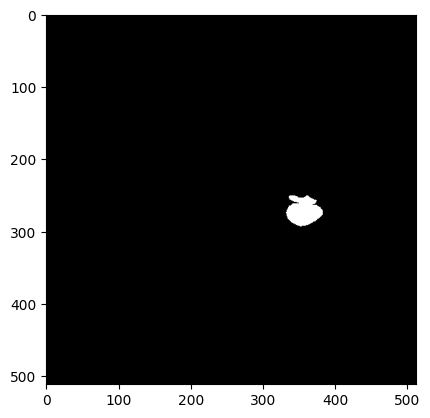

124


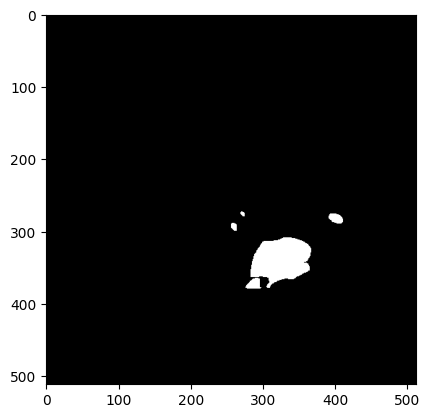

125


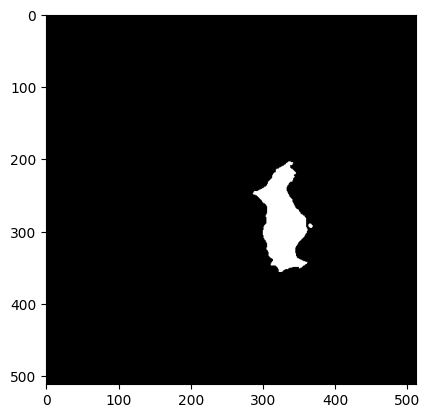

126


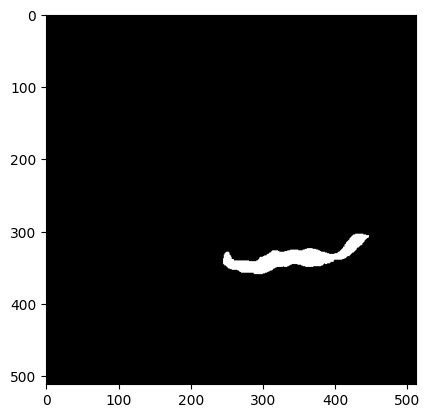

127


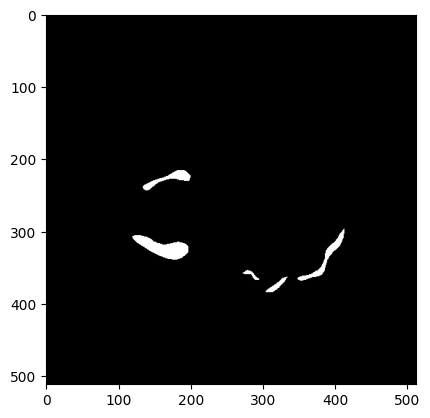

128


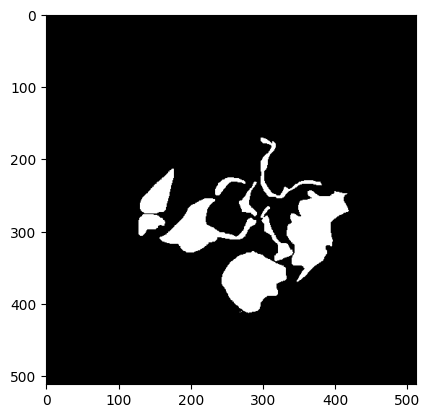

129


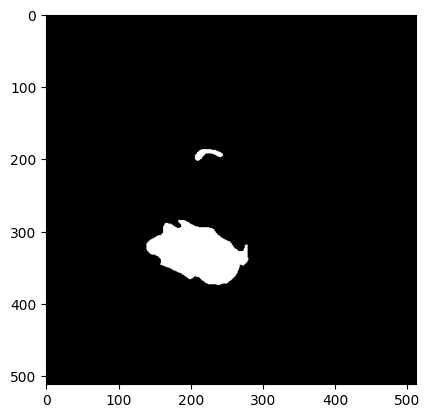

130


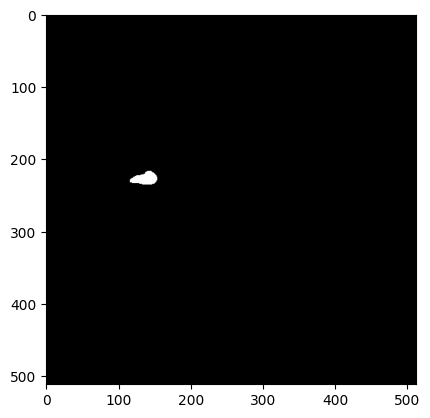

131


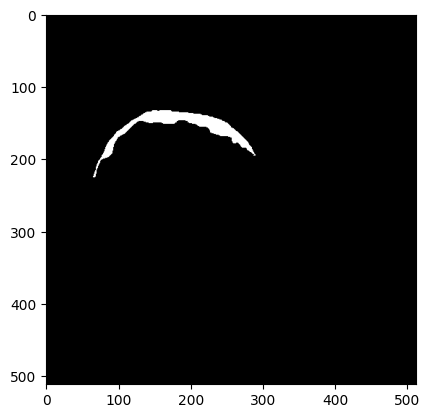

132


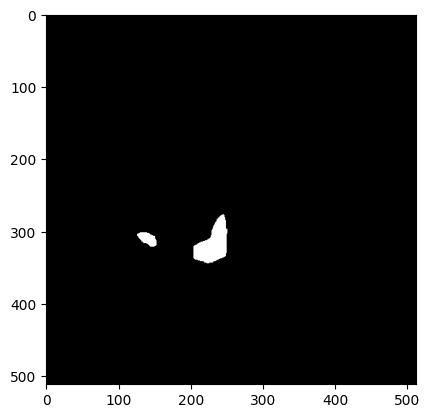

133


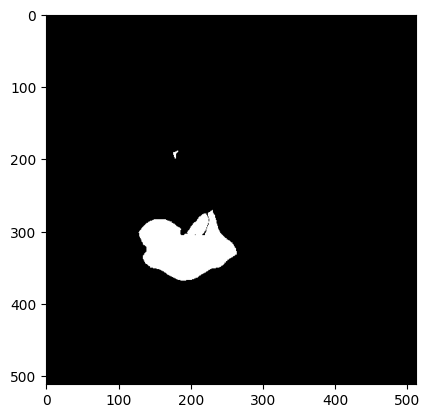

134


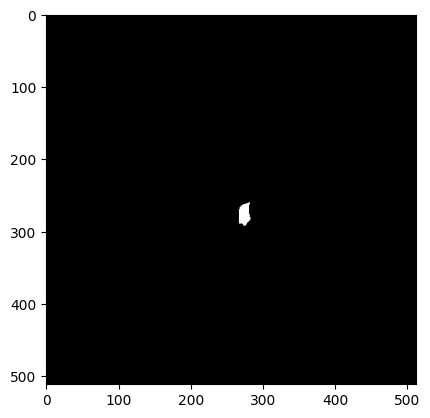

135


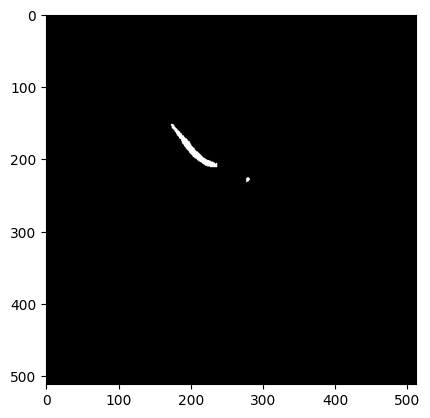

136


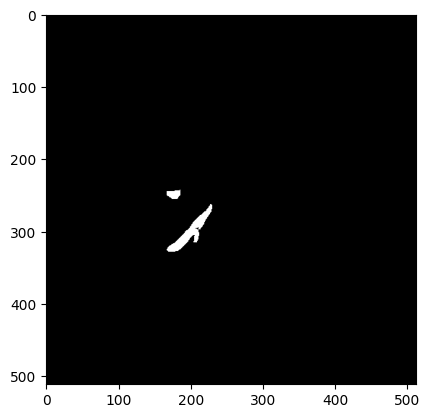

137


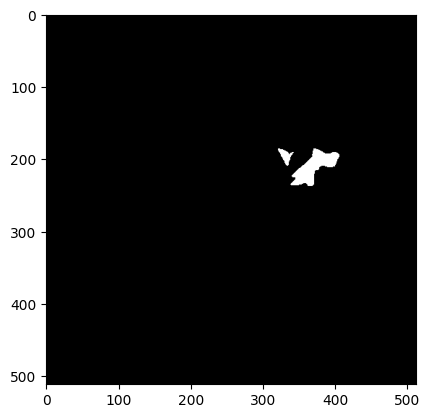

138


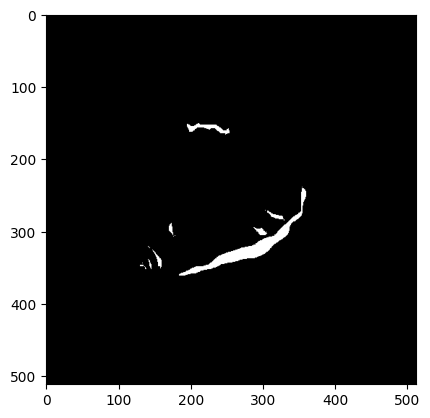

139


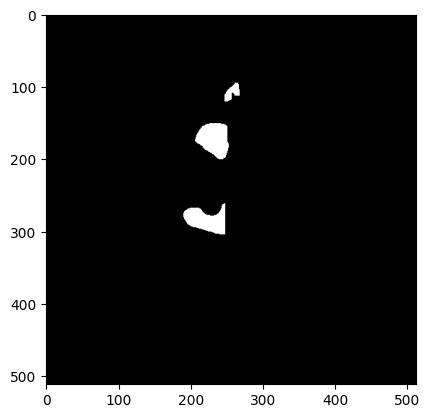

140


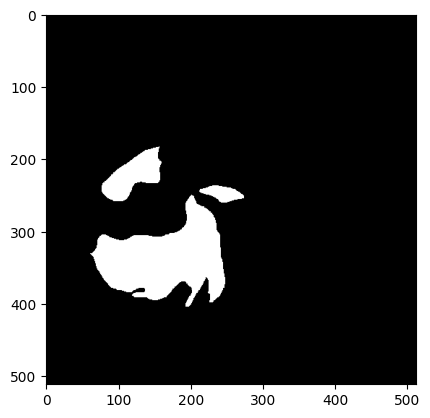

141


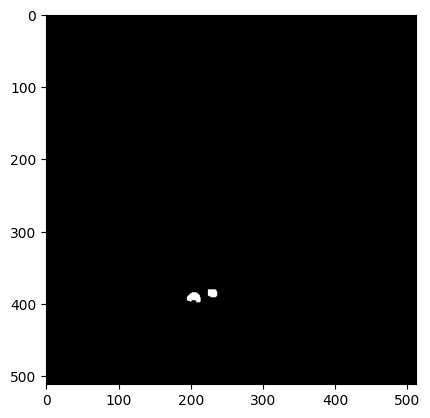

142


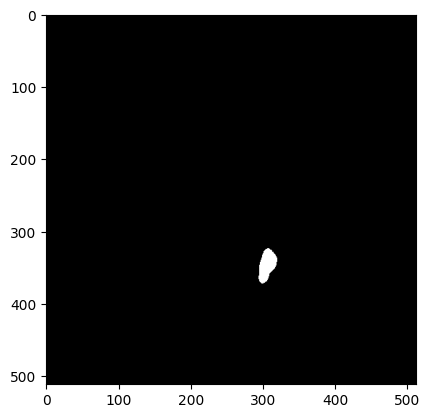

143


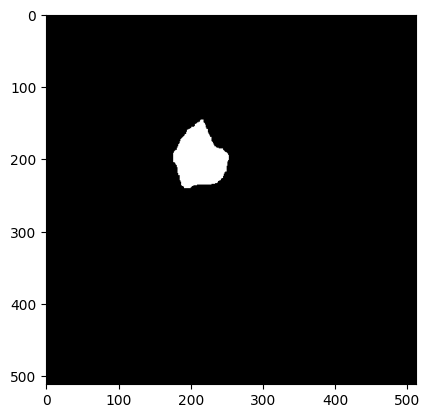

144


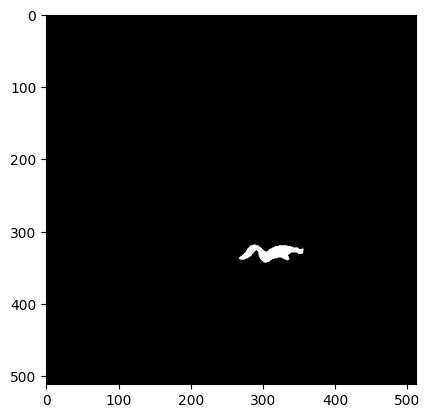

145


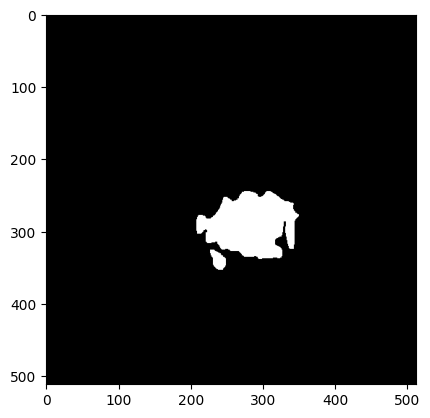

146


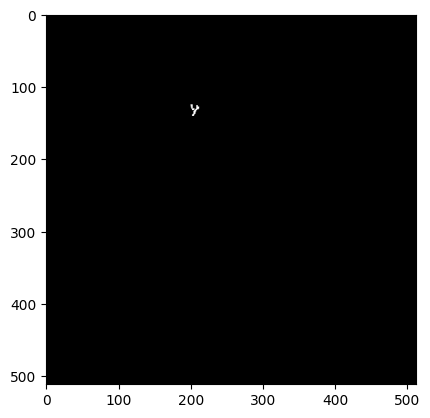

147


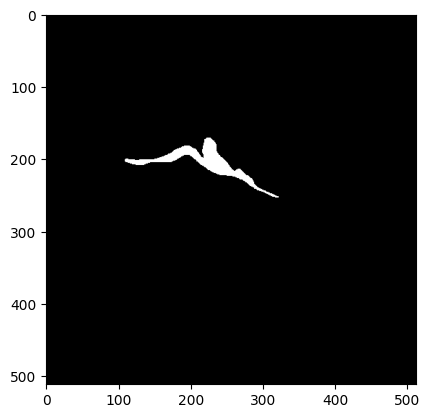

148


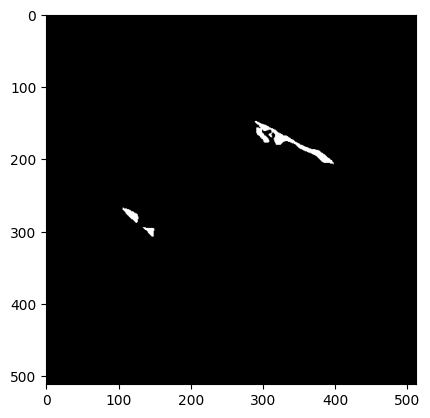

149


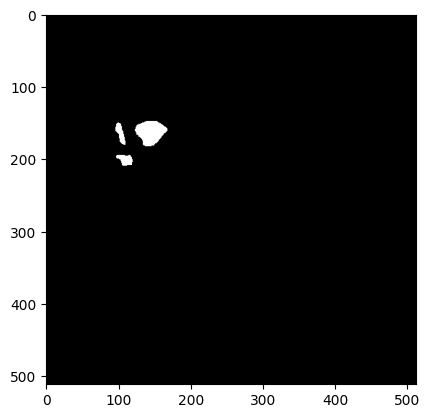

150


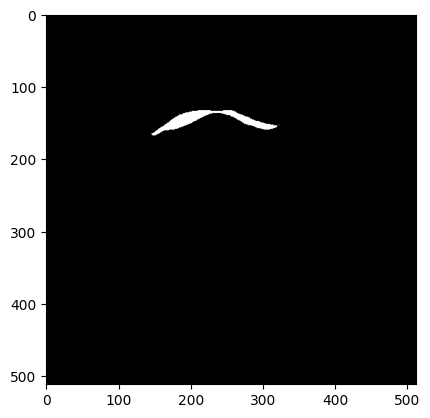

151


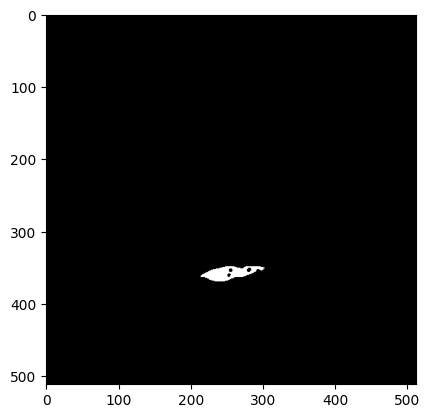

152


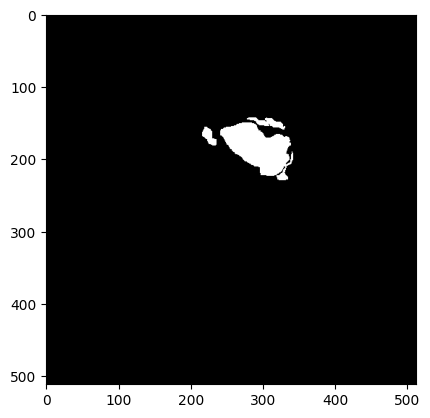

153


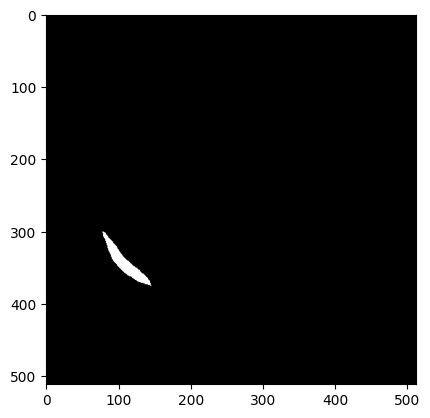

154


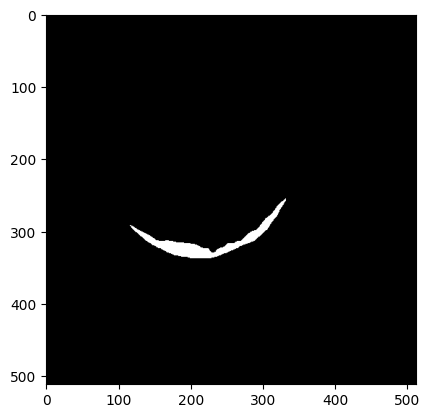

155


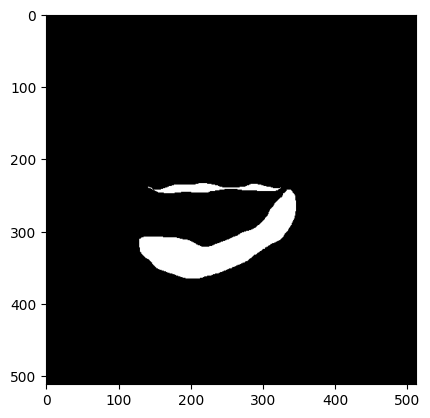

156


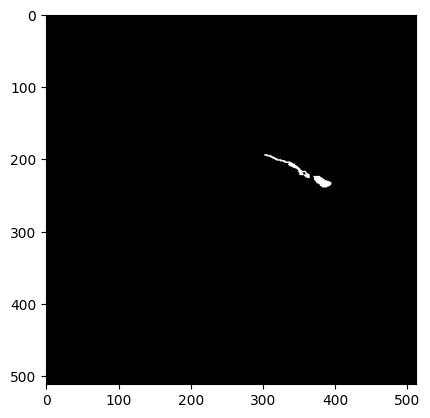

157


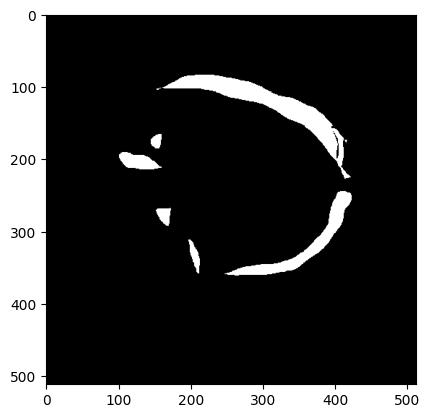

158


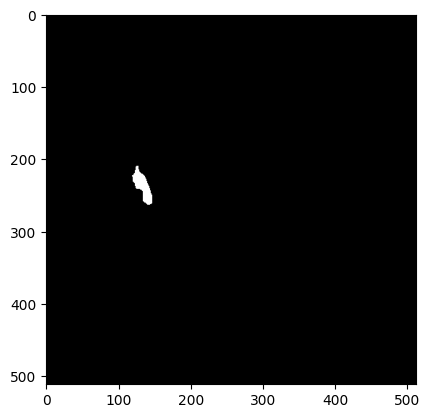

159


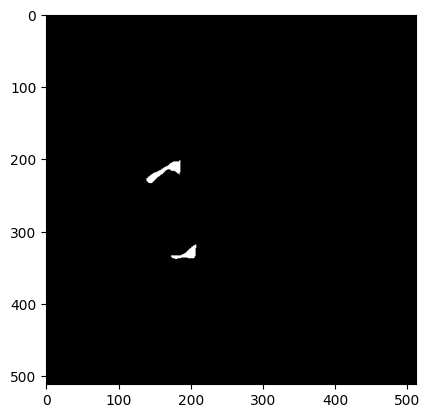

160


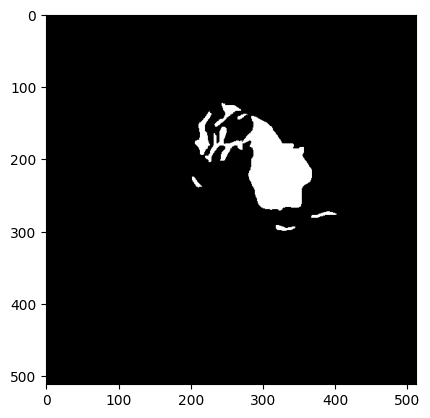

161


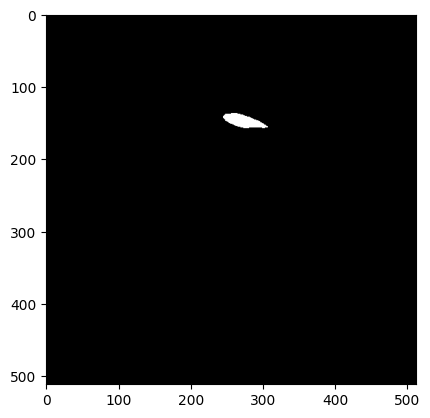

162


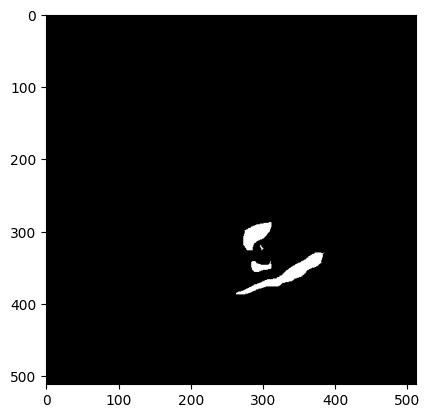

163


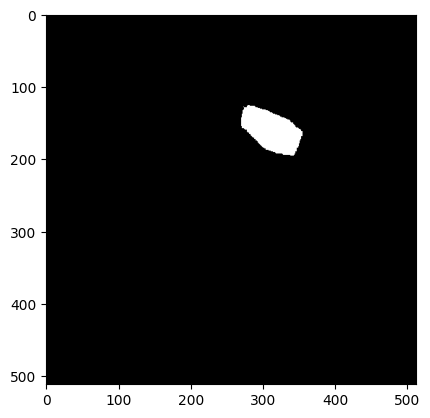

164


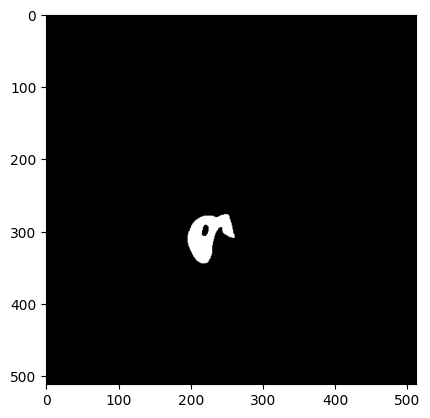

165


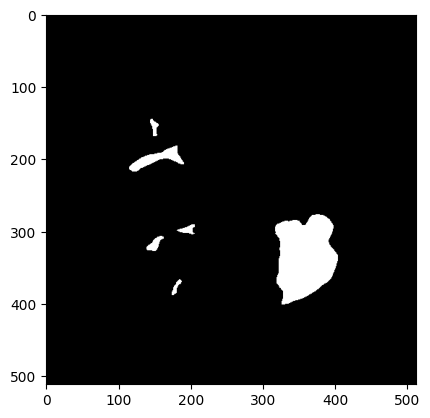

166


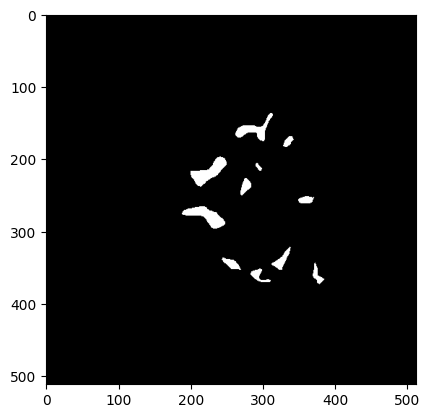

167


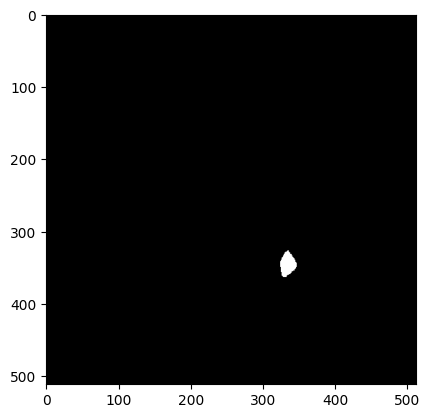

168


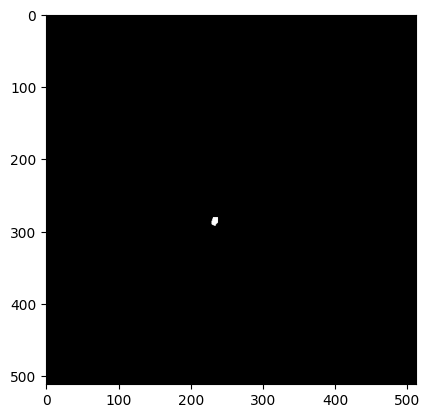

169


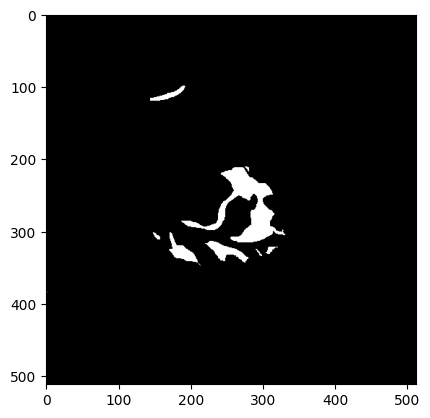

170


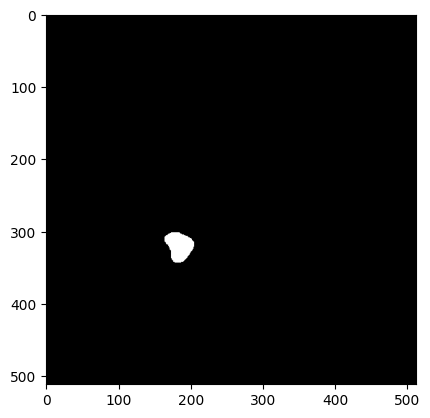

171


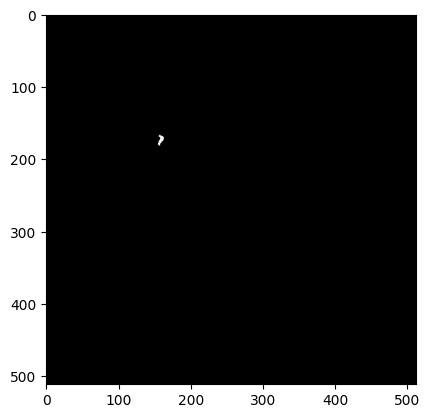

172


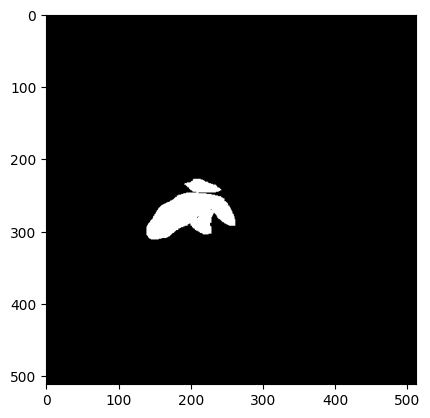

173


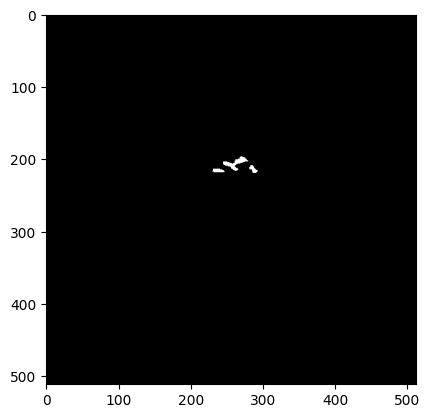

174


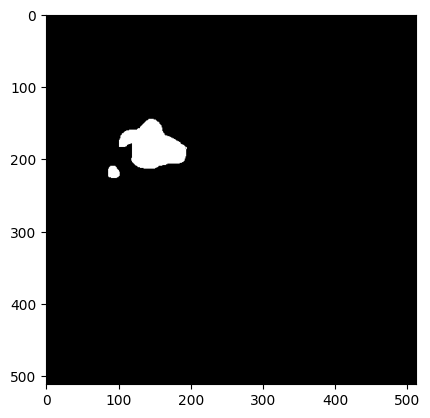

175


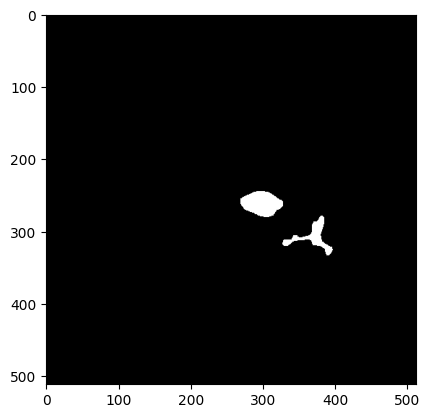

176


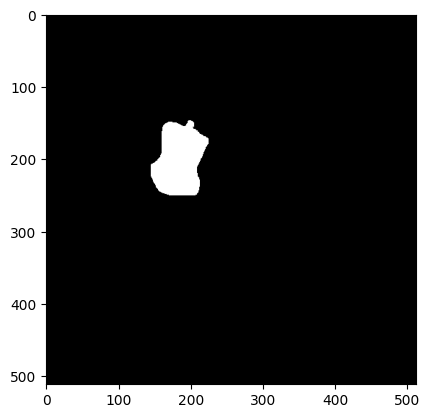

177


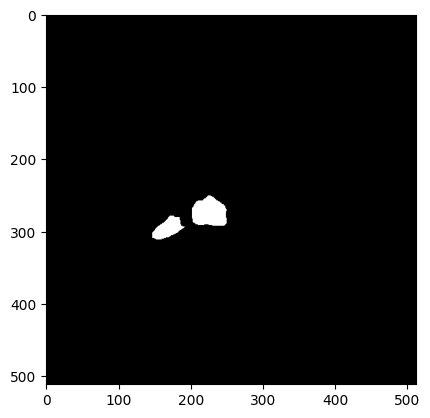

178


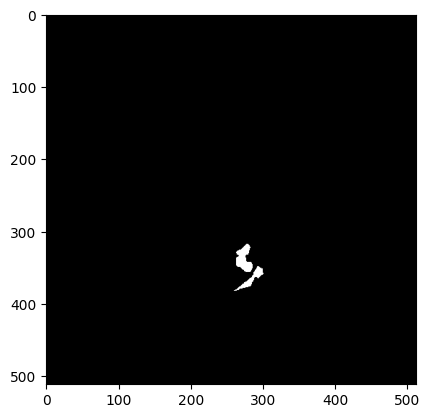

179


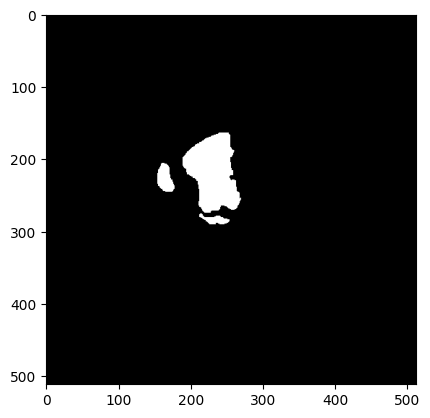

180


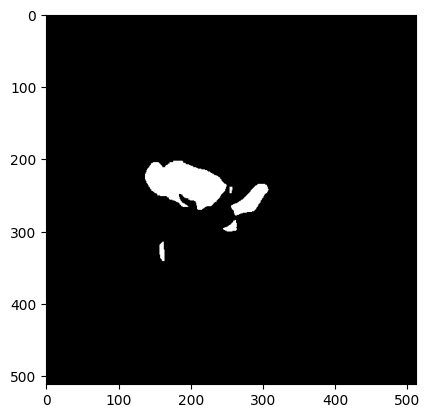

181


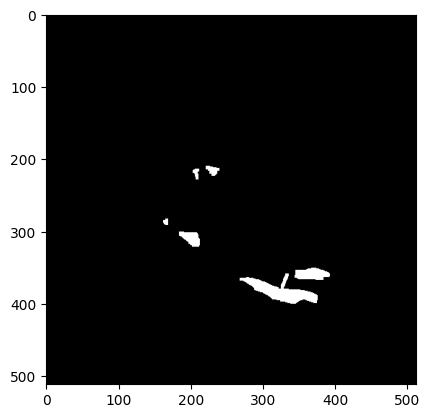

182


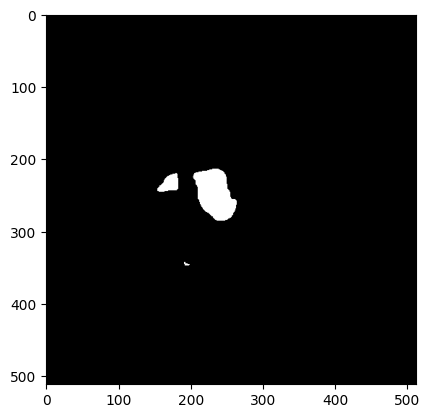

183


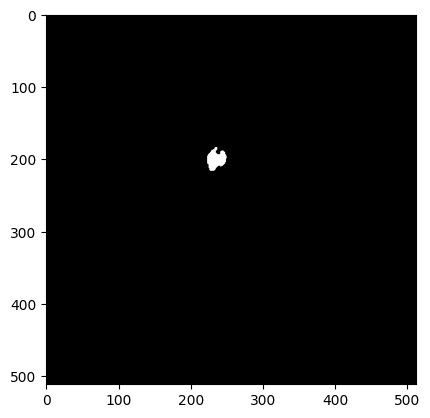

184


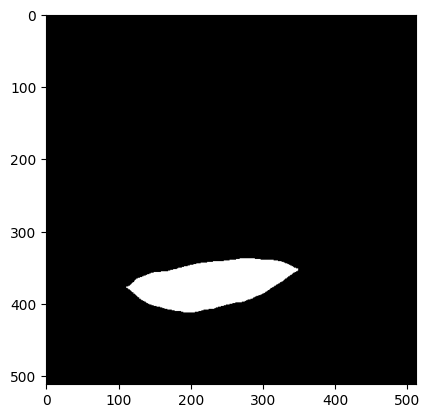

185


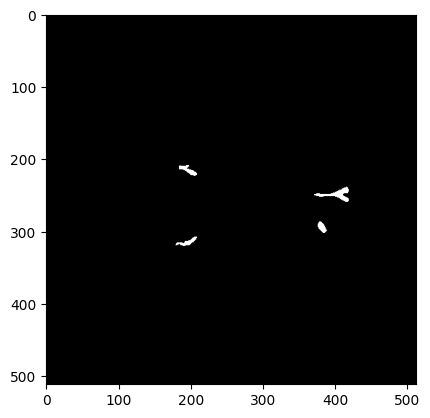

186


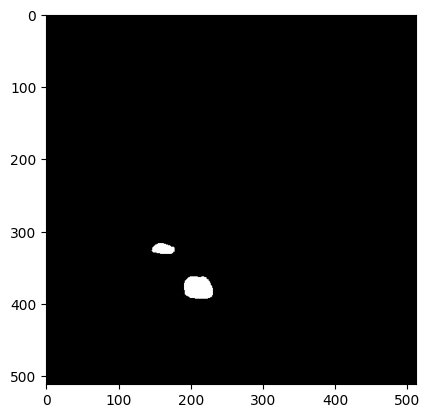

187


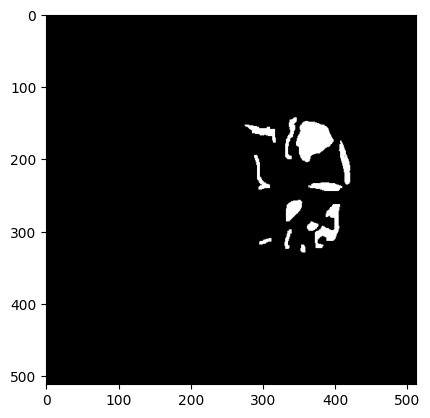

188


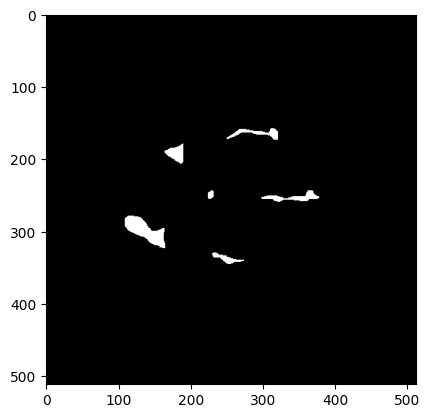

189


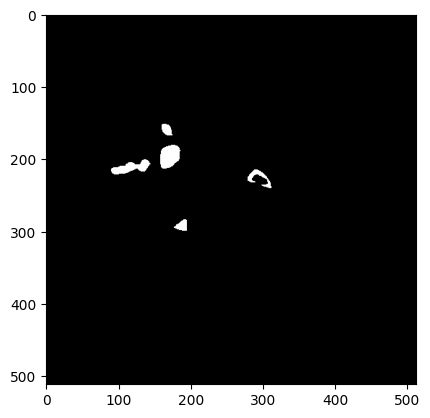

190


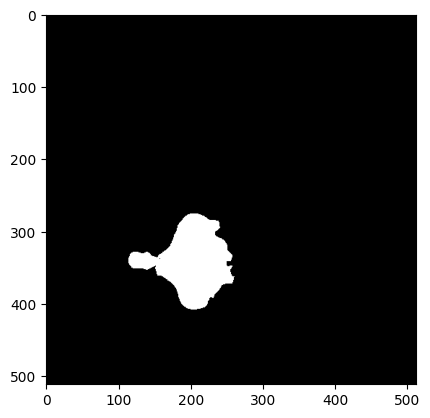

191


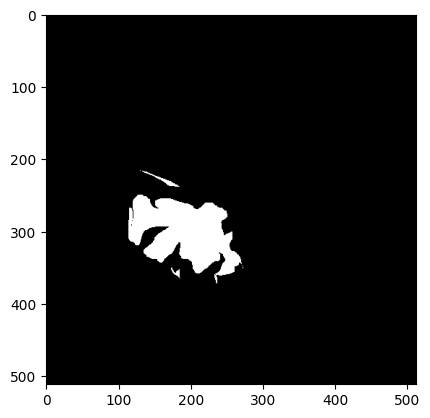

In [87]:
file_list = os.listdir('/home/users/aiml_jes/new_class_data/new_gt/')
# max_list = []
# for i in file_list:
#     temp = np.load('/home/users/aiml_jes/new_class_data/new_gt/' + i)
#     temp = temp['label']
#     a = temp.sum(axis=1).sum(axis=0)
#     print(np.max(a) == a[np.argmax(a)])
#     max_list.append(np.argmax(a))


for j in range(len(max_list)):
    print(j)
    temp = np.load('/home/users/aiml_jes/new_class_data/new_gt/' + file_list[j])
    temp = temp['label'][:,:,max_list[j]]
    plt.imshow(temp, cmap = 'gray')
    plt.show()

In [80]:
max_list[1]

5